<a href="https://colab.research.google.com/github/anvianna/anvianna/blob/main/Projeto_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inicio
<center>
 <h1> Modelagem e Analise de Sistemas Lineares com Python </h1>
 <h2> Espaço de estados e Observadores </h2>
 </center>

 Autores:
 - André Nascimento Vianna (andre.vianna@ufba.br)


Trabalho desenvolvido na matéria: \\
ENGF95 - ANÁLISE DE SISTEMAS II - **2022.1** \\
Docente: Márcio A.F Martins

# 1. Introdução

Esse obra tem como objetivo mostrar os fundamentos teóricos envolvidos com modelagem em espaço de estados e estimadores de estado em conjunto com sua aplicação ao vivo com ferramentas open-source em base python. Todos os exemplos mostrados aqui são processados no momento que são executados e podem ser alterados pelo leitor a fim de testar seus insights.

Como a aplicação da ferramenta em python se propõe a uma alternativa livre para o MATLAB, além das ferramentas necessárias para cálculos, também será introduzido com visualizações dinâmicas. 

Antes de irmos para o conceito teórico, vamos às bases necessárias para o uso de Python. Primeiramente, é preciso importar as bibliotecas que iremos utilizar.

Aviso: antes de tentar executar qualquer exemplo é importante executar essas duas primeiras células para estabelecer a base da biblioteca.

In [ ]:
# instalação do control
!pip install control
import control
# importação dos modulos necessarios
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy
import scipy.integrate as s_int
import scipy.signal as signal
import sympy as sym
import math
from math import sqrt, sin, radians, degrees 
from numpy.core.fromnumeric import shape
from matplotlib import rc
#widget modules
from ipywidgets import interact, interactive
import ipywidgets as widgets
rc('animation', html='jshtml') # linha necessaria para o funcionamento do matplotlib.animation em aplicações web
print('Bibliotecas importadas com sucesso')
np.set_printoptions(suppress=True,precision=4)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 4.2 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=ffe2be97d992ca9974fbc5d244b5c92111121ee88fe662d8ebeb675668f5c3a1
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control
Bibliotecas importadas com sucesso



<h1> Numpy </h1>

É uma das bibliotecas fundamentais para o uso de python em geral, sendo responsável pela estruturação dos dados em matrizes e operações associadas. A partir dele é possivel manipular dados de forma muito semelhante ao MATLAB. Mais informações no link abaixo:

<a href="https://numpy.org/doc/stable/index.html#numpy-docs-mainpage" target ="_blank"> Documentação do Numpy </a>

<a href="https://numpy.org/doc/stable/user/numpy-for-matlab-users.html" target ="_blank"> Relação entre comandos de MATLAB e Numpy </a>

<h1> Scipy </h1>

É uma biblioteca de computação cientifica com suporte para variadas operações matemáticas complexas. Para a simulação de sistemas o principal módulo é o *integrate* que contém toda a estrutura necessária para o cálculo de soluções de equações diferenciais presentes em modelos, em especial os não-lineares. Para modelos lineares é mais prático usar o módulo *signal*, suportando funções de transferência e espaços de estados lineares. Além desses, algumas outras funções específicas que são úteis estão espalhadas em outros módulos como linalg, que contém funções para processamento de álgebra linear, como o cálculo de autovalores de uma matriz.

Uma biblioteca auxiliar ao Scipy é Simpy que possibilita utilizar operações com sistema simbólico, aplicações dessa forma são melhores para visualização de operações complexas e com várias etapas. 

<a href="https://docs.scipy.org/doc/scipy/" target ="_blank"> Documentação do Scipy </a>

<a href="https://docs.sympy.org/latest/index.html" target ="_blank"> Documentação do Sympy </a>

<h1> Control </h1>

Uma biblioteca que utiliza funções do scypy e numpy para formar funções aplicadas especificamente para ajudar na simulação e ánalise de sistema de controle em malha fechada.

Dessa forma é possivel a maioria das coisas que indicadas com bibliotecas citadas de forma intuitiva, além de ter aplicações presentes não estão estruturadas em função no scipy como analise de controlabilidade.

<h1> Matplotlib </h1>

Tão importante quanto conseguir modelar e simular processos é saber apresentar os resultados obtidos de forma clara. Dessa forma, com essa biblioteca construirmos os gráficos variados com os elementos necessários.

<center>
<div>
  <img src="https://drive.google.com/uc?export=view&id=1LWPEEBl_dHTHz3Y5aK9WJhb0-5rI_LTE" width="400">
</div>
Elementos possiveis de um gráfico cartesiano gerado pelo Matplolib.
</center>


Uma forma diferencial apresentada aqui é o uso de gráficos animados para melhor visualização da evolução dos sistemas apresentados.



<a href="https://matplotlib.org/stable/index.html" target ="_blank"> Documentação do Matplotlib </a>





#2. Modelagem de sistemas de processo



Um sistema de processo consiste de uma relação causal entre variáveis fisicas através do tempo, as variáveis que desejamos controlar são chamada de variáveis de processos ou de **saidas** enquanto que as variáveis que manipulamos ou observamos e que influenciam a trajetória das variáveis de processo são chamadas de **entradas**. Para podermos indentificar e analisar essas relações entre as entradas e as saídas, construímos os chamados **modelos** que são aproximações que visam representar o comportamento do sistema. Um dos mais importantes é a aplicação de modelos matematicos que visam obter equações matemáticas que representem o sistema desejado.

<center>
  <div>
    <img src="https://edu.ieee.org/br-ufcgras/wp-content/uploads/sites/243/control-feedback.png" height="250">
  </div>
</center>


## Equação diferenciais

A fim de caracterizar matematicamente um fenômeno físico através do tempo, é preciso definir sua taxa de variação, em outras palavras, sua derivada. A relação entre derivada em um certo momento pode ser calculada a partir de uma Equação Diferencial, o tipo mais comum é quando somente precisamos da informação variação temporal de uma variável de processo, então usamos uma Equação Diferencial Ordinária ou **EDO**. Abaixo, um exemplo de EDO de primeira ordem


\begin{equation}
  \frac{d\phi(t)}{dt}= \dot{\phi}=\theta_1(t)\phi(t) + \theta_2(t)u(t) + \theta_3(t)
\end{equation}

Em que $\phi(t)$ é a variável depedente, $u(t)$ são as entradas do sistema e $\theta(t)$ representa parâmetros quaisquer, que pode ou não variar no tempo. Para resolver essa EDO, temos que integrar no tempo e devemos ter uma condição inicial, e então teremos o valor de $\phi$ no tempo. Dessa forma, podemos simular o comportamento de um sistema a partir de um sistema de EDO's. 

### Exemplo: Simulação com EDO's em python

Para exemplificar vamos modelar um pêndulo simples:

<center>
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Simple_gravity_pendulum.svg/1200px-Simple_gravity_pendulum.svg.png" width="250"/>
</div>
representação de um pêndulo ideal
</center>


Assumindo um pêndulo ideal em que a massa da aresta é muito menor que a massa da ponta e que o movimento está confinado a duas dimensões então podemos dizer que a dinâmica do pêndulo segue a seguinte equação diferencial:

$$
L\cdot\ddot{\theta}=g\cdot sin(\theta)
$$

Sendo $L$ e $g$ o comprimentto da aresta e a gravidade dessa forma é um sistema de segunda ordem. Para facilitação de simulação e que também será util para modelagem em espaço de estados, um sistema n-ordem podem ser descritas como um sistema de n equações diferenciais de primeira ordem. No caso é possivel destrinchar a dinamica da posição angular com a velocidade angular. Além disso adicionar um termo referente a resistência do ar na equação de velocidade.


\begin{equation}
  \dot{\theta}=\omega 
\end{equation}

\begin{equation}
  \dot{\omega}=\frac{g}{L}\cdot sin(\theta) -b\cdot\omega  
\end{equation}

Com essas informações podemos fazer a simulação desse modelo em python abaixo demonstrando o resultado de uma simulação de um forma estática e animada.





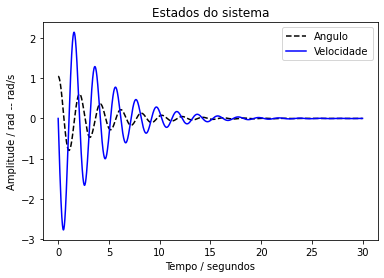

In [ ]:
# Modelo de um pendulo
def dinamica_pendulo(t,x,b):
  g = 9.8 # gravidade em m^2/s
  L = 1 # comprimento do pendulo em metros
  theta = x[0] # Angulo do pendulo rad
  alpha = x[1] # velocidade angular rad/s

  d_angulo = x[1]
  d_vel = -g/L*sin(x[0]) - b*x[1]
  return [d_angulo,d_vel]

ts = 0.01 # tempo de amostragem
tsim=np.transpose(np.arange(1,3000,1))  # numero de amostragems geradas
x0 = np.array([radians(60),0]) # Condição inicial de inclinação de 60 graus
Y = np.zeros(shape=(np.size(tsim)+1,2))
Y[0,:] = x0
x = []
y = []
fig , ax = plt.subplots() # Criando uma figura e eixos para um grafico
T = [0];
for i in tsim:
  # Integração do sistema de EDO's com coeficiente de resistencia do ar como 0.5
  sol = s_int.solve_ivp(dinamica_pendulo,np.array([0,ts]),Y[i-1,:],args=[0.5]) 
  Y[i,:] = sol.y[:,len(sol.y[1,:])-1] # pegando somente a condição final
  T = np.concatenate((T,[ts*i]),axis=0) 

ax.plot(T,Y[:,0],'k--',label = 'Angulo')
ax.plot(T,Y[:,1],'b',label = 'Velocidade')
ax.set_xlabel('Tempo / segundos')
ax.set_ylabel('Amplitude / rad -- rad/s')
ax.set_title('Estados do sistema')
ax.legend()



In [ ]:
print("Carregando a animação...")
# rotina de animação
def animate(i): 
  fr = 50 # numero total de frames
  j = int((3000/fr)*(i))
  ax.clear()
  ax.plot(T[1:j],Y[1:j,0],'k--',label = 'Angulo')
  ax.plot(T[1:j],Y[1:j,1],'b',label = 'Velocidade')
  ax.set_xlabel('Tempo / segundos')
  ax.set_ylabel('Amplitude / rad -- rad/s')
  ax.set_title('Estados do sistema')
  ax.legend()
  return ax,fig

ani = animation.FuncAnimation(fig, animate, frames=50, interval=100, repeat=False) 

ani

Carregando a animação...


Fique a vontade para mudar o valor do coeficiente da resistencia do ar e observar seus efeitos.


## Função de transferência 
Para se controlar um processo eficientemente é preciso saber como se comporta de acordo com a variação de entradas por isso modelos representativos são importantes. No entanto, trabalhar com EDO's é relativamente complexo e envolve operações matemáticas extensas que podem ser inviáveis de se fazer se os recursos computacionais não forem suficientes.

Para isso, são usadas certas abordagens para modelar sistemas de forma mais adequada à pespectiva de controle e ánalise de sistemas de processos, que são chamadas de teorias de controle. A mais antiga é chamada de controle clássico ou convencional é focado nos modelos que relacionam uma única saída com uma única entrada, que é o tipo *Single-Input Single-output* ou SISO, no domínio da frequência através da Transformada de Laplace chamada de função de transferência ou TF. 

\begin{equation}
Y(s) = G(s)\cdot U(s) → G(s) = \frac{b_ms^m + b_{m-1}s^{m-1}+\ldots+b_{1}s+b_0}{a_ns^n + a_{n-1}s^{n-1}+\ldots+a_{1}s+a_0}
\end{equation}

Em que $Y(s)$ e $U(s)$ são respectivamente uma saída e uma entrada do sistema no domínio da frequência. Como TF's são essencialmente algébricas elas são representadas pelos seus coeficientes nos numeradores e denominadores no formato de vetores em sistemas computacionais, não sendo diferente em python. 

Dessa forma se quisermos produzir a seguinte FT:
\begin{equation}
G(s) = \frac{s+1}{s^2 +6s + 8}
\end{equation}

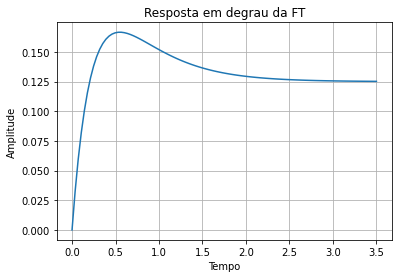

In [ ]:
FT = signal.lti([1,1], [1, 6, 8]) # classe de sistema linear com numerador = [b_1 b_0] e denominador = [a_2 a_1 a_0]
t, y = signal.step(FT) # produz resposta a função degrau na entrada 
plt.plot(t, y)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Resposta em degrau da FT')
plt.grid()

A função de transferência indica o comportamento inerente do sistema e pode ser obtida a partir a partir da medição da resposta do sistema. No entanto, é limitada a descrever sistemas lineares e invariantes no tempo e não contém nenhuma informação sobre composição física do sistema.





## Espaço de estados
A necessidade de realizar tarefas complexas e com boa precisão, levou ao desenvolvimento de uma forma diferente de análise, em relação ao sistema de controle clássico.

A chamada de teoria de controle moderno, diferencia do controle clássico principalmente por trabalhar no dominio do tempo e lidar com sistemas multivariáveis, *Multiple-input Multiple-output* ou MIMO, de forma holística, em vez de por par entrada-saída com múltiplos sistemas SISO, além disso ela possibilita fazer uso de modelos não-lineares e variantes no tempo. Sua abordagem é fundamentalmente baseada em modelos de espaço de estado.

O primeiro conceito a ser visto é o do estado de um sistema. Segundo Ogata(2009), “o estado de um sistema dinâmico é o menor conjunto de variáveis, de modo que o conhecimento destes valores em um tempo inicial t=t0, junto com o conhecimento dos valores do sinal de entrada, determina completamente o comportamento do sistema”. As variáveis de estado são as grandezas que compõem o estado do sistema.

Dessa forma, espaço de estados é uma estrutura que relaciona o vetor de entradas do sistema $u(t)$ com o vetor de saídas do sistema $y(t)$, através do vetor de variáveis de estados $x(t)$. ele é composto por equações de transições de estados $f(x(t),u(t))$ e equações de medição $h(x(t),u(t))$, em que os primeiros são equações diferenciais obrigatoriamente de primeira ordem. Tendo o formato abaixo:

\begin{equation}
\dot{x} = f(x(t),u(t)) \\
y(t) = h(x(t),u(t))
\end{equation}

Dessa forma, se relacionarmos o modelo de pêndulo simples mostrado anteriormente com alguma variável de saída, podendo ser os próprios estados:

<center>$y(t) = h(x(t),u(t)) = x(t)$ </center>

Então, já poderia ser classificado como um espaço de estado. Caso o modelo seja linear, então o espaço pode ser representado através de matrizes:

\begin{equation}
\dot{x} = A(t)x(t)+B(t)u(t) \\
y(t) = C(t)x(t)+D(t)u(t)
\end{equation}
 \\
Onde $A(t)$ é chamada de matriz de transição de estado, $B(t)$ de matriz de entrada, $C(t)$ de  matriz de saída, e $D(t)$ de matriz de transmissão direta. Dessa forma podemos interpretar o sistema de espaço de estados linear como 4 blocos para cada matriz representa uma característica do sistema; a matriz $A$ representa a dinâmica do sistema em que o valor dos estados serão realimentados para produzir os próximos valores no tempo, a matriz $B$ relaciona as entradas com a dinâmica do sistema com a matriz $C$ sendo a interface da medição com estados e como o valor influência a medição através da matriz $D$.

<center>
<div>
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Typical_State_Space_model.svg/1920px-Typical_State_Space_model.svg.png" width="400">
</div>
Diagrama em blocos de um espaço de estados
</center>

Se o modelo não houver nenhum parâmetro que varie temporalmente então as matrizes são constantes sendo normalmentes referido como *Linear Time-Invariant*(LTI) assim como uma FT típica, caso contrário são referidos como *Linear Parameter-Variant*(LPV). 

Espaços de estados LTI são bem mais convenientes de serem analisados e manipulados, com bastante teorias e arcabouço técnico já estabelecido. No entanto, dificilmente um processo físico é linear, logo muitas vezes são feitas aproximações de um modelo não-linear para conseguir um modelo LTI, mas a depender da não-linearidade do sistema isso pode afastar o modelo muito da realidade. Então um sistema LPV pode ser adotado para simular as não-linearidades enquanto soluções de controle linear ainda podem adotadas apesar de ser mais complexo de se lidarem.






### Linearização e Simulação com espaço de estados

Como os modelos de espaços de estados foram feitos para sistemas mais complexos iremos usar o modelo baseado no trabalho de Barcellos(2017) de 
sistema de tanques acoplados conforme mostrado na figura abaixo.

<center>
<div>
  <img src="https://drive.google.com/uc?export=view&id=1zvMs6dLHLB5EVOKg2eJ4Dg0Kw2gXnppc" width="400">
</div>
Diagrama de um sistema de tanques acoplados
</center>

Assumindo que o líquido é incompressível, podemos fazer o balanço de massa de modo que o nível de cada tanque pode ser descrito dessa forma:

\begin{equation}
A\cdot\dot{h} = q_{in} - q_{out}
\end{equation}

Transformando o escoamento do líquido a partir de Bernoulli e fazendo com que as vazões de entrada $q_1$ e $q_2$ sejam controladas a partir das frequências $f_1$ e $f_2$ por uma relação linear, então para o primeiro tanque:
\begin{equation}
A_1\cdot\dot{h_1} = k_1f_{1} - k_{12}\cdot\sqrt{h_1-h_2}
\end{equation}

e no segundo tanque:
\begin{equation}
A_2\cdot\dot{h_2} = k_2f_{2} + k_{12}\cdot\sqrt{h_1-h_2}-k_s\sqrt{h_2}
\end{equation}

Onde $k_{12},k_s$ são as constante de escoamento. Como pode ser visto, é um sistema de segunda ordem não-linear, então precisaremos linearizar o sistema se quisermos utilizar um controle linear. Vamos construir um espaço de estados LTI e comparar sua resposta com o modelo não-linear.

Para isso, usaremos a módulo para Sympy para construirmos o modelo simbolicamente e aplicarmos a série de Taylor mais facilmente.


In [ ]:
# Construindo as variaveis simbolicas
h1,h2 = sym.symbols('h_1 h_2') 
f1, f2 = sym.symbols('f_1 f_2')
A1,A2 = sym.symbols('A_1 A_2')
k1, k2,k12, ks = sym.symbols('k_1 k_2 k_{12} k_s')
# O nome das variaveis não é importante, o Sympy só irá processar o que foi introduzido dentro dos parenteses 


dh1 = (k1/A1)*f1 - (k12/A1)*sym.sqrt(h1-h2) # balanço de massa do Tanque 1
dh2 = (k2/A2)*f2 + (k12/A2)*sym.sqrt(h1-h2) - (ks/A2)*sym.sqrt(h2) # balanço de massa do Tanque 2



F = sym.Matrix([dh1,dh2]) # Vetor das derivadas 
X = sym.Matrix([h1,h2]) # Vetor das variaveis de estados 
U = sym.Matrix([f1,f2]) # Vetor das variaveis de entradas 



# Y = sym.Matrix([h1,(ks/A2)*sym.sqrt(h2)])
q12 = (k12/A1)*sym.sqrt(h1-h2)
qs = (ks/A2)*sym.sqrt(h2)
Y = sym.Matrix([q12,qs])

# Construção das matrizes do espaço de estado
A = F.jacobian(X) # Matriz de transição de estados
B = F.jacobian(U) # Matriz de entrada
C = Y.jacobian(X) # Matriz de saida
D = Y.jacobian(U) # Matriz de alimentação direta

A


Matrix([
[-k_{12}/(2*A_1*sqrt(h_1 - h_2)),                          k_{12}/(2*A_1*sqrt(h_1 - h_2))],
[ k_{12}/(2*A_2*sqrt(h_1 - h_2)), -k_{12}/(2*A_2*sqrt(h_1 - h_2)) - k_s/(2*A_2*sqrt(h_2))]])

In [ ]:
B

Matrix([
[k_1/A_1,       0],
[      0, k_2/A_2]])

In [ ]:
C

Matrix([
[k_{12}/(2*A_1*sqrt(h_1 - h_2)), -k_{12}/(2*A_1*sqrt(h_1 - h_2))],
[                             0,           k_s/(2*A_2*sqrt(h_2))]])

Como pode ser visto, as matrizes foram obtidas a partir das derivadas das funções diferenciais, agora precisamos substituir os valores dos parâmetros. Em Garcia(2017) é indicado quais são os valores adequados para esses parâmetros sabendo que as frequência estão em porcetagem e os níveis em centímetros. O valor das constantes já estão embutidos no valor das áreas $A_1$ e $A_2$ como 183 $cm^2$, então foi substituído o valor unitário na expressão.

In [ ]:


k_1  = 0.103911
k_2  = 0.0531765
k_s  = 0.0387696
k_12 = 0.104125

A = A.subs([(A1,1),(A2,1)])
A = A.subs([(k12,k_12),(ks,k_s),(k1,k_1),(k2,k_2)])
B = B.subs([(A1,1),(A2,1)])
B = B.subs([(k12,k_12),(ks,k_s),(k1,k_1),(k2,k_2)])
C = C.subs([(A1,1),(A2,1)])
C = C.subs([(k12,k_12),(ks,k_s),(k1,k_1),(k2,k_2)])
A


Matrix([
[-0.0520625/sqrt(h_1 - h_2),                        0.0520625/sqrt(h_1 - h_2)],
[ 0.0520625/sqrt(h_1 - h_2), -0.0520625/sqrt(h_1 - h_2) - 0.0193848/sqrt(h_2)]])

In [ ]:
B

Matrix([
[0.103911,         0],
[       0, 0.0531765]])

In [ ]:
C

Matrix([
[0.0520625/sqrt(h_1 - h_2), -0.0520625/sqrt(h_1 - h_2)],
[                        0,        0.0193848/sqrt(h_2)]])

Esses valores $h_1$ e $h_2$ são os pontos onde o modelo será linearizado. Para que essa técnica seja válida, é preciso que seja em pontos de estado estacionário. Então, vamos fazer a simulação do modelo não-linear para conseguir esses pontos.

In [ ]:
def din_tanques(t,x,u1,u2):
  
  A1  = 1
  A2  = 1

  k1  = 0.103911
  k2  = 0.0531765
  ks  = 0.0387696
  k12 = 0.104125
  
  
  h1 = x[0]
  h2 = x[1]
  f1 = u1
  f2 = u2

  dh1 = (k1/A1)*f1 - (k12/A1)*sqrt((h1-h2)) 
  dh2 = (k2/A2)*f2 + (k12/A2)*sqrt((h1-h2)) - (ks/A2)*sqrt(h2)
  return [dh1,dh2]

In [ ]:
ts = 1 # tempo de amostragem
tsim=np.transpose(np.arange(1,3000,1))  # numero de amostragems geradas
x0 = np.array([10,5]) 
X = np.zeros(shape=(np.size(tsim)+1,2))
X[0,:] = x0
T = [0];
U_ss = [0.8,0.7] # valor das entradas que irão gerar o estado estacionario 
for i in tsim:
  # Integração do sistema de EDO's
  sol = s_int.solve_ivp(din_tanques,np.array([0,ts]),X[i-1,:],args=U_ss)
  X[i,:] = sol.y[:,len(sol.y[1,:])-1]

A1 = 1;
A2 = 1;

X_ss = X[-1,:]
Y_ss = [(k_12/A1)*sqrt((X_ss[0]-X_ss[1])),(k_s/A2)*sqrt(X_ss[1])]
print('Estado estacionario - h1:',X_ss[0],'h2:',X_ss[1],' Cm')
print('Saida estacionaria - q12:',Y_ss[0],'qs:',Y_ss[1],' Cm^3/s')

Estado estacionario - h1: 10.27378723492312 h2: 9.636426626778993  Cm
Saida estacionaria - q12: 0.08312805586718675 qs: 0.12035089650994944  Cm^3/s


In [ ]:
A = A.subs([(h1,X_ss[0]), (h2,X_ss[1])]) # Substituindo o valor 
C = C.subs([(h1,X_ss[0]), (h2,X_ss[1])])
A

Matrix([
[-0.0652127342080647,  0.0652127342080647],
[ 0.0652127342080647, -0.0714573153775774]])

In [ ]:
C

Matrix([
[0.0652127342080647, -0.0652127342080647],
[                 0, 0.00624458116951268]])

Dessa forma podemos construir o modelo LTI em espaço de estados.

In [ ]:
# Transformando as matrizes simbolicas para o formato da Numpy
A_ss = np.array(A,dtype=np.float64) #np.float64 é o float normal do python aceito pela funções do scipy
B_ss = np.array(B,dtype=np.float64)
C_ss = np.array(C,dtype=np.float64)
D_ss = np.array(D,dtype=np.float64)
Tanque_linear = signal.lti(A_ss,B_ss,C_ss,D_ss) # Construindo o modelo de espaço de estado
print('Sistema linearizado:')
print(Tanque_linear)


Sistema linearizado:
StateSpaceContinuous(
array([[-0.0652,  0.0652],
       [ 0.0652, -0.0715]]),
array([[0.1039, 0.    ],
       [0.    , 0.0532]]),
array([[ 0.0652, -0.0652],
       [ 0.    ,  0.0062]]),
array([[0., 0.],
       [0., 0.]]),
dt: None
)


Dessa forma vamos fazer a comparação entre a resposta não-linear e linear.

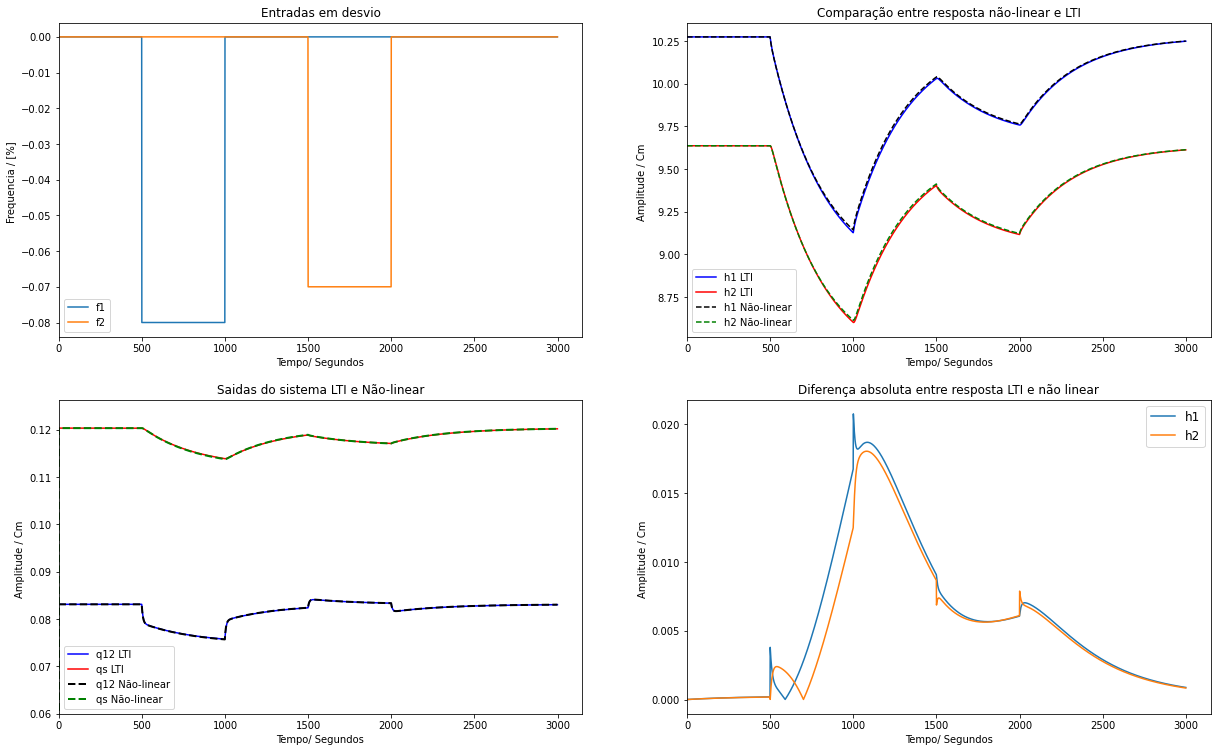

In [ ]:
ts = 1 # tempo de amostragem
tsim=np.transpose(np.arange(1,3000,1))  # numero de amostragems geradas
t = np.arange(0,(np.size(tsim)+1)*ts,ts) # Vetor de tempo
# Condição inicial sendo estado estacionario
x0 = X_ss 
Y = np.zeros(shape=(np.size(tsim)+1,2))
X = np.zeros(shape=(np.size(tsim)+1,2))
U = np.ones(shape=(np.size(tsim)+1,2))
A1 = 1;
A2 = 1;
k_1  = 0.103911
k_2  = 0.0531765
k_s  = 0.0387696
k_12 = 0.104125

# Determinando a entrada do sistema
U[:,0] = U_ss[0]
U[:,1] = U_ss[1]
U[500:1000,0] = U_ss[0]*0.9; # Degrau negativo de 10% em f1
U[1500:2000,1] = U_ss[1]*0.9; # Degrau negativo de 10% em f2

# Entrada em desvio
u = np.zeros((np.size(t),2))
u = U - U_ss

# Resposta não linear
X[0,:] = x0
for i in tsim:
  sol = s_int.solve_ivp(din_tanques,np.array([0,ts]),X[i-1,:],args=U[i,:])
  X[i,:] = sol.y[:,-1] 
  Y[i,:] = [(k_12/A1)*sqrt((X[i,0]-X[i,1])),(k_s/A2)*sqrt(X[i,1])]
  
t_a, y, x=Tanque_linear.output(u,t) # Extraindo a resposta linear do sistema forçado

r = abs(X-(x+X_ss))

# Construindo Grafico de respostas
fig3, ax3 = plt.subplots(2,2,figsize=(20,12)) # Figura com quatros eixos com Tamanho de 12x20 polegadas;
# Ajuste de posição
fig3.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)

#Primeiro eixo
ax3[0,0].plot(t,u[:,0],label='f1')
ax3[0,0].plot(t,u[:,1],label='f2')
ax3[0,0].set_title('Entradas em desvio')
ax3[0,0].set_xlabel('Tempo/ Segundos')
ax3[0,0].set_ylabel('Frequencia / [%] ')
ax3[0,0].set_xlim(left=0)
ax3[0,0].legend()

#Segundo eixo
ax3[0,1].plot(t,x[:,0]+X_ss[0],'b',label='h1 LTI')
ax3[0,1].plot(t,x[:,1]+X_ss[1],'r',label='h2 LTI')
ax3[0,1].plot(t,X[:,0],'k--',label='h1 Não-linear')
ax3[0,1].plot(t,X[:,1],'g--',label='h2 Não-linear')
ax3[0,1].set_title('Comparação entre resposta não-linear e LTI')
ax3[0,1].set_xlabel('Tempo/ Segundos')
ax3[0,1].set_ylabel('Amplitude / Cm ')
ax3[0,1].set_xlim(left=0)
ax3[0,1].legend()

#Terceiro eixo
ax3[1,0].plot(t,y[:,0]+Y_ss[0],'b',label='q12 LTI')
ax3[1,0].plot(t,y[:,1]+Y_ss[1],'r',label='qs LTI')
ax3[1,0].plot(t,Y[:,0],'k--',label='q12 Não-linear',linewidth = 2)
ax3[1,0].plot(t,Y[:,1],'g--',label='qs Não-linear', linewidth = 2)
ax3[1,0].set_title('Saidas do sistema LTI e Não-linear')
ax3[1,0].set_xlabel('Tempo/ Segundos')
ax3[1,0].set_ylabel('Amplitude / Cm ')
ax3[1,0].set_xlim(left=0)
ax3[1,0].set_ylim(bottom=0.06)
ax3[1,0].legend()


#Quarto eixo
ax3[1,1].plot(t,r[:,0],label='h1')
ax3[1,1].plot(t,r[:,1],label='h2')
ax3[1,1].set_title('Diferença absoluta entre resposta LTI e não linear')
ax3[1,1].set_xlabel('Tempo/ Segundos')
ax3[1,1].set_ylabel('Amplitude / Cm ')
ax3[1,1].set_xlim(left=0)
ax3[1,1].legend(fontsize = 'large')

Como pode ser visto, a diferença entre a resposta do sistema não-linear e linear é minima, para esse caso, na proximidade da região de linearização. Então, para operações nessa faixa de variação de entrada é satisfatorio usar o modelo LTI, mas é preciso fazer avaliações caso a caso para outros pontos de operação e faixas maiores.



### Discretização



Apesar da modelagem de processos de forma continua ser importante em varios aspectos, para aplicação em campo geralmente é preciso usar modelos discretizados.Além disso dentre as vantagens de lidar com equações discretas está.

*   Matematica mais simples
*   Integração e derivadas são substituidas por soma e diferença
*   Computação mais rapida.

Sistemas discretos consistem em medições em periodo que quando fixados podem ser visto como sistema como um sistema de avanço e atraso de forma que:

\begin{equation}
f(t_0) = x[k] \\  
f(t_0+Δt) = x[k+1] \\
\end{equation}

Aplicando isso no espaço de estados:

\begin{equation}
\dot{x} = f(x,u,t) \\
y(t) = g(x,u,t) \\ 
-\\
x[k+1] = f(x[k],u[k],Δt) \\
y[k] = g(x[k],u[k],Δt) \\
\end{equation}

Para conseguir as equaçãoes de transferencia e medição do sistema existem varios metodos de discretização sendo o objetivo deles é de conseguir um modelo que preserve a estabilidade do sistemas, iremos apresentar o mais simples, diferenças finitas e uma implementação exata da discretização.



O primeiro metodo consiste de utilizar o mesmo meio para linearização de sistema com serie de taylor fazendo aproximaçao do sistema na primeira derivada.

\begin{equation}
f(t_0+Δt) = f(t_0) + f'(t_0)Δt + R_1(t) \\
f'(t_0) = \frac{f(t_0+Δt) - f(t_0)}{Δt}-\frac{R_1(t)}{Δt}
\end{equation}

Em que $R_1(t)$ é erro de aproximação dado pela fatores de ordem superior. No entanto no dominio continuo é usado $Δt⟶0$ de forma que o erro por aproximação seja muito pequeno no ponto. Então quando é usado $Δt$ e supondo que $R_1(t)$ seja pequeno o suficiente então podemos aproximar a derivada do sistema como:

\begin{equation}
f'(t_0)≈  \frac{f(t_0+Δt) - f(t_0)}{Δt}
\end{equation}

Assumindo um $Δt$ fixo então podemos enxegar o sistema como em atraso e avanço

\begin{equation}
f'(t_0) = \frac{x[k+1] - x[k]}{Δt} 
\end{equation}

Fazendo essa transição para um espaço de estado linear:
\begin{equation}
\dot{x} = Ax + Bu \\
y = Cx+Du\\
---\\
\frac{x[k+1]-x[k]}{Δt}=Ax[k] + Bu[k] \\
x[k+1] = (A\cdotΔt)x[k] + x[k] + (B\cdotΔt) u[k] \\
x[k+1] = (A\cdotΔt+ I)x[k] + (B\cdotΔt) u[k] \\ 
\end{equation}

Dessa forma podemos ver que as matrizes do sistema discreto pode ser formada a partir de suas correspondentes continuas, nesse metodo pode ser usado partir das relações abaixo:
$$
A_d = A⋅Δt+I ; B_d = B\cdotΔt; C_d = C; D_d = D
$$

No entanto essa aproximação depende do erro de aproximação ser baixo a medida que é aumentado $Δt$ esse erro aumenta afastando do comportamento do modelo continuo.

Já a discretização exata é derivada da solução da equação diferencial no tempo de um sistema forçado, aplicado a um espaço de estados LTI:
$$
\dot{x}=Ax(t)+Bu(t) \\
x(t) = e^{At}x(\tau)+e^{At}\int_{\tau}^{t}{e^{-Aλ}Bu(λ)dλ}
$$
se fizemos essa soluçao para um passo de $T_s$ então:
$$
x(T_s) = e^{AT_s}x(0)+e^{At}\int_{0}^{T_s}{e^{-Aλ}Bu(λ)dλ} \\
x(T_s) = e^{AT_s}x(0)+e^{At}B\int_{0}^{T_s}{e^{-Aλ}u(λ)dλ}
$$

Dessa forma podemos identificar como a resposta de transição do sistema está no primeiro termo e a resposta forçada está no segundo termo, então nesse caso:
$$
A_d = e^{AT_s} ; B_d = e^{AT_s}B\int_{0}^{T_s}{e^{-Aλ}dλ}
$$

Essa discretização é a exata, ou seja sem erro de discretizaçãoo, que contem a informação de toda a expansão da serie de taylor enquanto o primeiro metodo só levar em conta o primeira derivada. vamos mostrar abaixo a influencia disso:

Suponha esse sistema abaixo:

\begin{array}{l}
  \dot{x} = \begin{bmatrix}-1&2 \\1&-3\end{bmatrix}x +   \begin{bmatrix}1\\0\end{bmatrix}u \\
  y = \begin{bmatrix}0 & 1\end{bmatrix}x
\end{array}

In [ ]:
def linear_func(Ts):
  A = np.array([[-1,2],[1,-3]])
  B = np.array([[1],[0]])
  C = np.array([[0,1]])
  D = np.array([[0]])
  
  A_d = np.eye(A.shape[0])+A*Ts
  B_d = B*Ts

  sys_c = signal.lti(A,B,C,D)
  print(type(sys_c))
  sys_d = signal.dlti(A_d,B_d,C,D,dt=Ts)
  sys_d2 =sys_c.to_discrete(Ts)
  t, y = signal.step2(sys_c)
  t2,y2 = signal.dstep(sys_d,n=len(t))
  t3,y3 = signal.dstep(sys_d2,n=len(t))

  fig,ax = plt.subplots(1,2,figsize=(12,6))
  
  ax[0].plot(t,y,'b',label = 'Continuo')
  ax[0].step(t2,np.squeeze(y2),'r--',label='D. Finita')
  ax[0].step(t3,np.squeeze(y3),'g--',label='D. Exata')
  ax[0].set_ylim(bottom=0,top=max(y)*1.1)
  ax[0].set_xlim(left=0,right=5)
  ax[0].set_ylabel('Amplitude')
  ax[0].set_title('Resposta do sistema continuo e discretizado')
  ax[0].legend(loc='lower right')

  ax[1].plot(t,y,'b',label = 'Continuo')
  ax[1].step(t2,np.squeeze(y2),'r--',label='D. Finita')
  ax[1].step(t3,np.squeeze(y3),'g--',label='D. Exata')
  ax[1].set_ylim(bottom=0,top=max(y)*1.1)
  ax[1].set_xlim(left=0,right=30)
  ax[1].set_ylabel('Amplitude')
  ax[1].set_title('Resposta do sistema continuo e discretizado')
  ax[1].legend(loc='lower right')
  
print('Use o slider aumentar ou diminuir o tempo de amostragem \n(Demora alguns segundos para a mudança ter efeito no grafico)')

interactive_plot = interactive(linear_func,Ts=(0.01,0.60,0.01))
output = interactive_plot.children[-1]
interactive_plot

Use o slider aumentar ou diminuir o tempo de amostragem 
(Demora alguns segundos para a mudança ter efeito no grafico)


interactive(children=(FloatSlider(value=0.3, description='Ts', max=0.6, min=0.01, step=0.01), Output()), _dom_…

Então podemos ver que o primeiro metodo está sujeito a desconvergencia sensivel ao passo de amostragem, enquanto que a exata não tem esse problema. No entanto ele ainda é só aproximação do continuo podendo ter erros na hora de fazer o caminho inverso, ou seja, a recomposição do sinal do discreto para o continuo e operações associadas a modelos continuos. 


## Relação entre Função de transferencia e Espaço de Estados

Como já mostrado aqui Funções de transferencias e espaço de estados são diferentes formas de representar um mesmo sistema linear. Dessa forma podemos modelar processo com uma FT e transformar em espaço de estados e vice-versa.

Uma coisa importante de salientar é que uma FT é uma representação da resposta do sistema no tempo. Portanto ela descreve a relação matematica, não o sistema fisico em si, então dois sistemas com comportamento iguais são descritos pela mesma FT sendo assim unica.

Enquanto que o espaço de estados é somente o conjunto minimo de variaveis que representam o sistema mas a escolhas das variaveis é livre. Dessa forma assim como existe infinitas possibilidades de matrizes que apresentam uma mesma solução, é possivel descrever um mesmo sistema fisico com diferentes representações de espaço de estados.

Então para transformar um Espaço de estados só existe um caminho que é atraves da transformada de laplace.

$$
\dot{x}=Ax+Bu → sX(s)=AX(s)+BU(s)   \\
y = Cx+Du → Y(s) = CX(s)+DU(s) \\
$$
Temos que conseguir a relação entre $Y(s)$ e $U(s)$ então:
$$
sX(s)-AX(s)=BU(s)→(sI-A)X(s)=BU(s) \\
X(s) = (sI-A)^{-1}BU(s)
$$
Substituindo na equação de mediação
$$
Y(s) = C((sI-A)^{-1}BU(s))+DU(s) \\
Y(s) = (C(sI-A)^{-1}B+D)U(s) \\
\frac{Y(s)}{U(s)} = G(s) = C(sI-A)^{-1}B+D 
$$

Se o sistema for MIMO então ela produzira $ny\cdot nu$ FT's relacionando cada par entrada-saida ou matriz de dimensão $(ny\times nu)$

vamos pegar o exemplo anterior para mostrar isso 

In [ ]:
A = np.array([[-1,2],[1,-3]])
B = np.array([[1],[0]])
C = np.array([[0,1]])
D = np.array([[0]])
SS = signal.lti(A,B,C,D)

s = sym.symbols('s')
t = sym.symbols('t')

Gs = sym.Matrix(C)*sym.Matrix(s*np.eye(A.shape[0])-A).inv()*sym.Matrix(B) + sym.Matrix(D)
Gs

Matrix([[-1/(-1.0*s**2 - 4.0*s - 1)]])

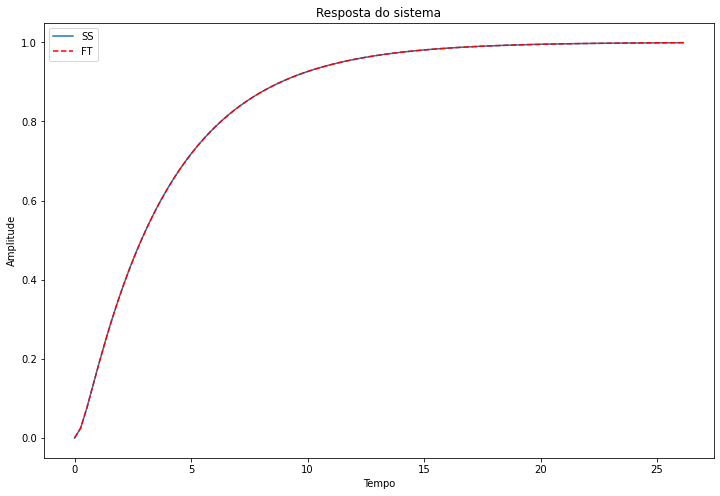

In [ ]:
#Transformando a função de transferencia no formato do signal.lti
SS2FT = signal.lti([-1],[-1,-4,-1])
t1,y1 = signal.step2(SS) # Resposta do espaço de estados
t2,y2 = signal.step2(SS2FT) # Resposta do FT derivada
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(t1,y1,label='SS') 
ax.set_title('Resposta do sistema')
ax.plot(t2,y2,'r--',label='FT') 
ax.set_ylabel('Amplitude')
ax.set_xlabel('Tempo')
ax.legend()
#ax.set_title('Resposta do Função de Transferencia')

Já, o caminho de função de transferência para espaço de estados é variado a depender das escolhas feitas para realização do sistema.

Para fazermos essa transição, devemos conseguir neutralizar a derivadas contidas na função de transferência através da substituição por variáveis auxliares. Dessa forma, a saída do sistema será composta por uma combinação linear das variáveis auxiliares.

Por exemplo, pegue essa TF de terceira ordem:

$$
\frac{Y(s)}{U(s)} = \frac{b_0}{s^3+a_1s^2+a_2s+a_3}
$$
Então:
$$
Y(s)(s^3+a_1s^2+a_2s+a_3) = b_0 U(s) \\
s^3Y(s) + a_1s^2Y(s)+a_2sY(s)+a_3Y(s) = b_0U(s) \\
s^3Y(s) = -(a_1s^2Y(s)+a_2sY(s)+a_3Y(s))+b_0U(s)
$$
Com essa TF em especifico, podemos dizer que as variáveis auxiliares do sistema são a saida do sistema com suas progressivas derivadas.

$$
Q_1(s) = Y(s) \\
Q_2(s) = sY(s) \\
Q_3(s) = s^2Y(s)
$$

Assim podemos montar as relações dessas variáveis com suas derivadas.

\begin{array}{lll}
sQ_1(s)= Q_2 \\
sQ_2(s) =Q_3 \\
sQ_3(s) = s^3Y(s) → \\
sQ_3(s) = -a_1s^2Y(s)-a_2sY(s)-a_3Y(s)+b_0U(s) \\
sQ_3(s) = -a_1Q_3-a_2Q_2-a_3Q_1+b_0U(s) \\
\end{array}

Passando para dominio do tempo, conseguimos as nossas matrizes.
$$
\dot{q}(t)=\begin{bmatrix}0 & 1 & 0 \\
                       0 & 0 & 1 \\
                       -a_3 & -a_2 & -a_1\end{bmatrix}q(t)
                       + \begin{bmatrix}0\\ 0 \\b_0\end{bmatrix}u(t) \\
y(t) = \begin{bmatrix}1&0&0 \end{bmatrix}q(t)
$$

As variáveis auxiliares serão justamente os estados do sistema. No entanto, como pode ser visto aqui eles só são ferramentas matemáticas, não estão ligados a alguma grandeza física como quando modelarmos direto para espaço de estado a partir das leis naturais.

Sendo assim, podemos usar várias possibilidades de variáveis auxiliares que irão produzir espaços de estados diferentes. Algumas representações de sistemas são mais interessantes de serem implementadas por facilitarem operações e análises. São as chamadas formas canônicas. As principais são:

1. **Forma Canonica Diagonal**

$$
\frac{Y(s)}{U(s)} = \frac{b_0s^m+b_1s^{m-1}+\dots+b_m}{(s+p_1)(s+p_2)\dots(s+p_n)}
$$

$$
\dot{q}(t)=\begin{bmatrix}-p_1 & 0 & \dots &0 \\
                       0 & -p_2 &\dots&0 \\
                       \vdots &\vdots & \ddots &\vdots \\
                       0 & 0 & \dots & -p_n
                       \end{bmatrix}q(t)
                       + 
                       \begin{bmatrix}1 \\ 1 \\\vdots\\ 1\end{bmatrix}u(t) \\
y(t) = \begin{bmatrix}k_1&k_2&\dots& k_n \end{bmatrix}q(t) + b_ou(t)
$$

Produz uma matriz $A$ diagonal com elementos dos pólos $p_n$ e que $k_1,k_2,\dots,k_n$ são os coeficientes das frações parciais da TF. Usada principalmente para análise de estabilidade do sistema. Nem todo sistema é diagonalizável, como no caso de pólos repetidos então é usado a **Forma Canônica de Jordam**.



$$
\frac{Y(s)}{U(s)} = \frac{b_0s^m+b_1s^{m-1}+\dots+b_m}{(s+p_1)^2\dots(s+p_n)}
$$

$$
\dot{q}(t)=\begin{bmatrix}-p_1 & 1 & \dots &0 \\
                       0 & -p_1 &\dots&0 \\  
                      \vdots & \vdots & \ddots & \vdots \\
                       0  & 0&\dots& -p_n
                       \end{bmatrix}q(t)
                       + 
                       \begin{bmatrix}1 \\ 1 \\\vdots\\ 1\end{bmatrix}u(t) \\
y(t) = \begin{bmatrix}k_1&k_2&\dots& k_n \end{bmatrix}q(t)
$$


2. **Forma Canônica de Controlabilidade**

$$
\frac{Y(s)}{U(s)} = \frac{b_0s^m+b_1s^{m-1}+\dots+b_{m-1}s+b_m}{s^n+a_1s^{n-1}+\dots+a_{n-1}s+a_n}
$$

$$
\dot{q}(t)=\begin{bmatrix}0 & 1 & 0& \dots &0 \\
                       0 & 0 & 1 & \dots&0 \\
                       \vdots &\vdots &\vdots & \ddots &\vdots \\
                       0 & 0 & 0 &\dots & 1\\
                       -a_n & -a_{n-1} & -a_{n-2} &\dots & -a_1
                       \end{bmatrix}q(t)
                       + 
                       \begin{bmatrix}0 \\ 0 \\\vdots\\ 0 \\ 1\end{bmatrix}u(t) \\
y(t) = \begin{bmatrix}b_n-a_nb_0&b_{n-1}-a_{n-1}b_0&\dots& b_1-a_1b_0 \end{bmatrix}q(t) + b_ou(t)
$$
Esse formato é importante para projetos de controle por facilitar o calculo do ganho do controlador.
3. **Forma Canônica de Observabilidade**
$$
\frac{Y(s)}{U(s)} = \frac{b_0s^m+b_1s^{m-1}+\dots+b_{m-1}s+b_m}{s^n+a_1s^{n-1}+\dots+a_{n-1}s+a_n}
$$

$$
\dot{q}(t)=\begin{bmatrix}0 & 0 &  \dots & 0 & -a_n \\
                       1 & 0 & \dots&0 & -a_{n-1} \\
                       0 & 1 & \dots&0 &-a_{n-2}\\
                       \vdots &\vdots & \ddots &\vdots &\vdots \\
                       0 & 0 &\dots &1 & -a_1
                       \end{bmatrix}q(t)
                       + 
                       \begin{bmatrix}b_n-a_nb_0 \\
                       b_{n-1}-a_{n-1}b_0\\
                       b_{n-2}-a_{n-2}b_0\\
                       \vdots\\
                       b_{1}-a_{1}b_0 \end{bmatrix}u(t) \\
y(t) = \begin{bmatrix}0&0&0&\dots& 1 \end{bmatrix}q(t) + b_ou(t)
$$

Como podemos observar, a forma de observabilidade tem uma relação com a forma de controlabilidade em que suas matrizes de estado são transposta uma da outra e a troca tranposta entre a matriz de entrada e de saída.

Isso está relacionado às propriedades de Controlabilidade e Observabilidade do sistema que indicam a ligação com as entradas e saídas com a dinâmica do sistema que será explicado posteriomente.

Essas formas são importantes para aplicações relacionadas a projetos de controladores e estimadores de estado.

Além da transformação a partir de FT, é possivel transformar um espaço de estado existente em umas das formas canônicas através do descobrimento de uma transformação linear do estado $x$ tal que:
$$
x = T\cdot q
$$

A matrix $T$ irá mudar de acordo com o formato desejado. Aplicando essa transformação no sistema original, então a transformação é feita da seguinte forma:
$$
\dot{x} = Ax+Bu → T\cdot\dot{q} = (AT)q + Bu \\
\dot{q} = (T^{-1}AT)q + (T^{-1}B)u\\
$$
Dessa forma, a nova matriz de transição de estados vai ser$A_n =T^{-1}AT$ e a matriz de entrada $B_n=T^{-1}B$. A mesma coisa para a equação de medição:
$$
y = Cx+Du → y = CTq+Du \\
$$

A matriz de transformação para o formato diagonal é basicamente a matriz de autovetores correspodentes. Dessa forma, no python é possivel conseguir essa matrix através da função _np.linalg.eig_.



In [ ]:
A = [[9,3,2],[5,4,2],[2,3,2]]
B = [[2],[1],[0]]
C = [[2,3,1]]
D = [[0]]
M,T = np.linalg.eig(A)
print('T:',T)

A_new = np.linalg.inv(T)@A@T
print('A:',A_new)
B_new = np.linalg.inv(T)@B
print('B:',B_new)
C_new = C@T
print('C:',C_new)

T: [[-0.7661 -0.4423 -0.064 ]
 [-0.5575  0.431  -0.4211]
 [-0.3199  0.7865  0.9048]]
A: [[12.0183  0.      0.    ]
 [ 0.      2.5193 -0.    ]
 [ 0.     -0.      0.4624]]
B: [[-2.1966]
 [-0.692 ]
 [-0.175 ]]
C: [[-3.5245  1.195  -0.4864]]


Quando a matriz tiver autovalores repetidos a função eig() irá retornar os autovalores e a matriz de autovetores, mas o operador não terá utilidade para transformar na forma canônica de Jordan que portanto não produzirá a análise correta. Soluções computacionais numéricas definitivas para o cálculo da matriz de transformação para Jordan não existem por conta da sua instabilidade com o formato ponto flutuante, mas é possivel fazer com estrutura simbólica, entretanto, se os números não forem exatos não produziram a forma desejada.

In [ ]:
A = [[9,-15,-25],[1,0,0],[0,1,0]] # Matriz com autovalor 5 repetido
As = sym.Matrix(A)
P,J=As.jordan_form()
J

Matrix([
[-1, 0, 0],
[ 0, 5, 1],
[ 0, 0, 5]])

In [ ]:
P

Matrix([
[ 1, 25, 10],
[-1,  5,  1],
[ 1,  1,  0]])

Para as formas canônicas de observabilidade e controlabilidade, é possível usar as funções da biblioteca control para trasformações.

In [ ]:
A = [[9,3,2],[5,4,2],[2,3,2]]
B = [[2],[1],[0]]
C = [[2,3,1]]
D = [[0]]
SS = control.ss(A,B,C,D)
print('Sistema original')
print(SS)
# Essa funções tem as seguintes sintaxe:
# Essas funções retornam duas informações:
# [zsys,T] = control.canonical form(xsys,form='form')
# zsys- O sistema no formato da biblioteca na forma canonica
# T - a matriz de transformação em numpy.ndarray
SS_O = control.canonical_form(SS,form='observable') # Para conseguir vc deve selecionar qual vc quer:
# Forma de observabilidade = 'observable'
# Forma de controlabilidade = 'reachable'
# Também é possivel usar o formato direto
#SS_O = control.observable_form(SS) 
print('Forma Canonica de Observabilidade ')
print(SS_O[0])
SS_C = control.reachable_form(SS)
print('Forma Canonica de Controlabilidade')
print(SS_C[0])





Sistema original
<LinearIOSystem>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[9. 3. 2.]
     [5. 4. 2.]
     [2. 3. 2.]]

B = [[2.]
     [1.]
     [0.]]

C = [[2. 3. 1.]]

D = [[0.]]

Forma Canonica de Observabilidade 
A = [[ 15.   1.   0.]
     [-37.   0.   1.]
     [ 14.   0.   0.]]

B = [[  7.]
     [-14.]
     [  7.]]

C = [[1. 0. 0.]]

D = [[0.]]

Forma Canonica de Controlabilidade
A = [[ 15. -37.  14.]
     [  1.   0.   0.]
     [  0.   1.   0.]]

B = [[1.]
     [0.]
     [0.]]

C = [[  7. -14.   7.]]

D = [[0.]]



# 3. Propriedades dos sistemas

Para podermos elaborar qualquer sistema de controle, é preciso conhecer as características do processo controlado, por isso é importante analisar e extrair suas propriedades, pois suas informações serão vitais no projeto de controladores e estimadores.

A partir da estrutura do modelo criado, é possivel realizar diferentes análises de comportamento do sistema representado. O uso de modelos em espaço de estados facilita a análise de sistemas multivariáveis.

A propriedade fundamental em controle de processos é de **estabilidade** do sistema pois está relacionado à resposta em relação ao tempo do sistema. Com o espaço de estados emerge a importância da análise de **controlabilidade** e **estabilidade**, pois está relacionado à capacidade de implementação de controladores e estimadores no processo.

_Devido às grandes variedades de comportamentos possíveis, as definições dessas propriedaes mudam em casos limites. As apresentadas a seguir são aplicadas para sistemas LTI._

## Estabilidade 

Uma das informações cruciais de um processo é a resposta temporal. Ela pode ser separada em duas partes: estacionário e transiente. A primeira é referente a se o sistema convergirá e em que ponto isso ocorrerá. Caso essa análise demonstre que o sistema converge, então a análise da resposta transiente indica a trajetória do sistema para esse ponto. Todas essas informações podem ser derivadas da análise de estabilidade do sistema.

A noção de estabilidade está associada aos pontos de equilíbrio do sistema, em que para uma entrada definida e estados correspodentes as derivadas dos estados são iguais a zero.

$$
\dot{x} = f(x,u) = 0_n
$$

Se a partir desse ponto o sistema for pertubado (ou o sistema estiver em outro ponto) e ele voltar ao ponto original quando a pertubação cessar, em vez de se afastar, então esse ponto de equilíbrio é estável. Cada sistema pode ter vários pontos de equilíbrio estáveis locais com regiões de atração, pontos em que o sistema é estável para aquele ponto de equilíbrio.

Podemos verificar a estabilidade do sistema em espaço de estados de um ponto a partir da resposta temporal dele dado pela equação abaixo:
$$
x(t) = \phi(t)x(0) + \phi(t)\int^{t}_0{\phi(λ)Bu(λ)dλ}
$$

Sendo $\phi(t)$ a função de transição de estado. Podemos deduzir que esse sistema voltará ao ponto se ela for decrescente:

$$
\phi(t) = 0; t → ∞
$$

Para sistemas lineares a função de transição de estado sempre é a exponencial da matriz $A$.

$$
\phi(t) = e^{At}
$$

Para que uma função seja decrescente é preciso que a matriz $A$ seja matriz negativa definida, ou seja os autovalores associados tenham todos parte real negativas. Isso se aplica para sistemas contínuos, já para sistemas discretos como a matriz $A_d$ é igual a $e^{ATs}$ quando os autovalores da matriz $A$ forem negativos com que $A_d < 1$ então para que o sistema seja estável é preciso que esteja dentro do círculo unitário.
<center>
<div>
  <img src="https://drive.google.com/uc?export=view&id=1oQbD2wf__V2KkRcrXPryfAW5MNtNRlQs" width="600">
</div>
Relação entre autovalores e estabilidade no sistema continuo e discreto
</center>


O que acontece quando a maior parte do sistema é estavel mas um ou mais polos estão na fronteira entre a estabilidade e a instabiliddade, Ou seja tenha o polo igual a zero no sistema continuo ou igual a um no sistema discreto? 

Então nessa forma o sistema nem voltará ao ponto de equilibrio e nem aumentará indefinidamente, ficando em uma região estavel, ficando em estado chamadaa de marginalmente estavel.

Como pode ser visto a parte real dos polos indica a estabilidade do sistema. já a parte imaginaria surgirá quando a resposta do sistema for oscilatoria.

<center>
<div>
  <img src="https://www.roymech.co.uk/images/control_M.gif" width="400">
</div>
resposta temporal de sistemas estaveis, instaveis e marginalmente estaveis.
</center>




### Diagramas de Fase


Uma forma de visualizar essa propriedade é através dos diagramas de fase em que a evolução do sistema é mostrada com o valor da variáveis nos eixos em vez de temporalmente.

Dessa forma é possivel ver claramente onde ficam os pontos de equilíbrio e o comportamento da variáveis entre elas.

<center>
<div>
  <img src="https://tutorial.math.lamar.edu/Classes/DE/PhasePlane_Files/image003.png" width="200">
  <img src="https://tutorial.math.lamar.edu/Classes/DE/PhasePlane_Files/image004.png" width="200">
  <img src="https://tutorial.math.lamar.edu/Classes/DE/PhasePlane_Files/image006.png" width="200">
</div>
Diagrama de fase com respostas instável e estáveis com pólos reais diferentes e pólos repetidos.
</center>

<center>
<div>
  <img src="https://tutorial.math.lamar.edu/Classes/DE/PhasePlane_Files/image009.png" width="200">
  <img src="https://tutorial.math.lamar.edu/Classes/DE/PhasePlane_Files/image010.png" width="200">
  <img src="https://tutorial.math.lamar.edu/Classes/DE/PhasePlane_Files/image008.png" width="200">
</div>
Diagrama de fase com respostas instável e estáveis com pólos complexos e marginalmente estável.
</center>

Iremos realizar o diagrama de fase para o sistema do pêndulo. Para isso, é conhecido que o único ponto de equilíbrio estável desse sistema é a origem. Mas a natureza da sua estabilidade depende do coeficiente de atrito do ar, que aqui vamos chamar de $Ζ$.

In [ ]:
z = sym.symbols('\Zeta')
a,v = sym.symbols('a v') 
g = 9.8

da = v
dv = -g*a + z*v

F = sym.Matrix([da,dv]) # Vetor das derivadas 
X = sym.Matrix([a,v]) # Vetor das variaveis de estados 

F

Matrix([
[              v],
[\Zeta*v - 9.8*a]])

In [ ]:
Az = F.jacobian(X) # Matriz de transição de estados
Az

Matrix([
[   0,     1],
[-9.8, \Zeta]])

In [ ]:
L = sym.symbols('\lambda')
P = sym.det(A - np.eye(2)*L) # Polinomio caracteristico 

P

-1.0*\Zeta*\lambda + 1.0*\lambda**2 + 9.8

A solução do polinomio então pode ser conseguida por baskara:

$$
λ=\frac{-b±\sqrt{b^2-4ac}}{2a}
$$

Se fizermos a análise do polinômio característico, podemos perceber que quando $Ζ < 0$ então os autovalores calculados terão a parte real negativa, o tornando estável, e quando $Ζ > 0$ terão a parte a parte real positiva, o deixando estável. Por fim, se for nulo, o pêndulo irá oscilar para sempre, sendo assim marginalmente estável.

E que os pólos serão complexos, a menos que:
$$
|Ζ| > \sqrt{4\cdot 9.8} ≈ 6.26 
$$




In [ ]:
def dinamica_pendulo(t,x,b):
  g = 9.8 # gravidade em m^2/s
  L = 1 # comprimento do pendulo em metros
  theta = x[0] # Angulo do pendulo rad
  alpha = x[1] # velocidade angular rad/s

  d_angulo = x[1]
  d_vel = -g/L*sin(x[0]) + b*x[1]
  return [d_angulo,d_vel]



def linear_func(Zeta):
  Ar = np.array(Az.subs(z,Zeta)) # Substituição do coeficiente 
  ss_pen=control.ss(Ar,[[0],[0]],np.eye(2),[[0],[0]])
  ts = 0.01 # tempo de amostragem
  tsim=np.transpose(np.arange(1,3000,1))  # numero de amostragems geradas
  x0 = np.array([radians(60),0]) # Condição inicial de inclinação de 60 graus
  Y = np.zeros(shape=(np.size(tsim)+1,2))
  Y[0,:] = x0
  T = [0];
  for i in tsim:
    sol = s_int.solve_ivp(dinamica_pendulo,np.array([0,ts]),Y[i-1,:],args=[Zeta]) 
    Y[i,:] = sol.y[:,len(sol.y[1,:])-1] # pegando somente a condição final
    T = np.concatenate((T,[ts*i]),axis=0) 

  print('Polos do sistema:')
  print(control.poles(ss_pen))

  fig , ax = plt.subplots() 

  
  ax.plot(Y[:,0],Y[:,1],'k')
  ax.arrow(Y[1000,0],Y[1000,1],Y[1000,0]-Y[999,0],Y[1000,1]-Y[999,1],lw=1, length_includes_head=True, head_width=.25)
  ax.arrow(Y[100,0],Y[100,1],Y[100,0]-Y[99,0],Y[100,1]-Y[99,1],lw=1, length_includes_head=True, head_width=.25)
  ax.arrow(Y[2000,0],Y[2000,1],Y[2000,0]-Y[1999,0],Y[2000,1]-Y[1999,1],lw=1, length_includes_head=True, head_width=.25)
  ax.plot(Y[0,0],Y[0,1],'bo',label = 'ponto inicial',markersize=10)
  ax.plot(Y[-1,0],Y[-1,1],'ro',label = 'ponto final',markersize=10)
  ax.set_xlabel('Angulo / rad')
  ax.set_ylabel('Velocidade / rad/s')
  ax.set_title('Diagrama de fase')
  ax.grid()
  ax.legend(loc='upper left')

interactive_plot = interactive(linear_func,Zeta=(-0.5,0.5,0.05))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='Zeta', max=0.5, min=-0.5, step=0.05), Output()), _do…

Testando então como ficaria o diagrama com Zeta para que os pólos do sistema não tenham parte imaginária e seja estável.

Polos do sistema:
[-2.8+0.j -3.5+0.j]


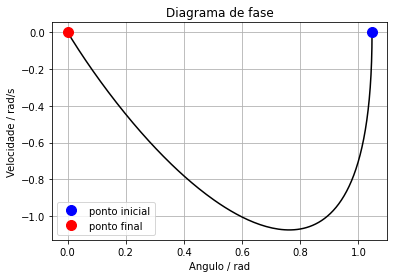

In [ ]:
Zeta = -6.3
Ar = np.array(A.subs(z,Zeta))
ss_pen=control.ss(Ar,[[0],[0]],np.eye(2),[[0],[0]])
ts = 0.01 # tempo de amostragem
tsim=np.transpose(np.arange(1,3000,1))  # numero de amostragems geradas
x0 = np.array([radians(60),0]) # Condição inicial de inclinação de 60 graus
Y = np.zeros(shape=(np.size(tsim)+1,2))
Y[0,:] = x0
T = [0];
for i in tsim:
  sol = s_int.solve_ivp(dinamica_pendulo,np.array([0,ts]),Y[i-1,:],args=[Zeta]) 
  Y[i,:] = sol.y[:,len(sol.y[1,:])-1] # pegando somente a condição final
  T = np.concatenate((T,[ts*i]),axis=0) 

print('Polos do sistema:')
print(control.poles(ss_pen))

fig , ax = plt.subplots() 


ax.plot(Y[:,0],Y[:,1],'k')
ax.plot(Y[0,0],Y[0,1],'bo',label = 'ponto inicial',markersize=10)
ax.plot(Y[-1,0],Y[-1,1],'ro',label = 'ponto final',markersize=10)
ax.set_xlabel('Angulo / rad')
ax.set_ylabel('Velocidade / rad/s')
ax.set_title('Diagrama de fase')
ax.grid()
ax.legend(loc='best')

### Estabilidade de Lyapunov



Uma outra forma de abordamos a estabilidade é definição de Lyapunov. Segundo sua teoria, um ponto de equilíbrio $x_e$ é estável se para qualquer condição inicial $x(0)$ existir uma distância $δ$ e $ϵ$ de $x_e$ tal que:
$$
||x(0)|| < δ → ||x(t)|| < ϵ; ∀t \text{ , } δ < ϵ
$$
o que significa, que caso o sistema se afaste de forma finita do ponto $x_e$ então é estável, conforme mostrado na figura abaixo:
<center>
<div>
  <img src="https://drive.google.com/uc?export=view&id=1flxSuic5v8b0ZEpY_gec1ygW2G5ioOrZ" width="800">
</div>
Evolução de ponto equilíbrio estável segundo Lyapunov
</center>

Para ser assintoticamente estável, então deve existir um distância $r>0$ para que:
$$
||x(0)|| < r ⇒ ||x(t)|| \rightarrow 0, t → ∞
$$
No entanto, a trajetória também deve ser contida dentro de uma distância $ϵ$. Pode ser visto que o primeiro caso cobre também o caso do marginalmente estável.

Dito isto, podemos verificar essas duas estabilidades a partir do Método de Lyapunov. Esse método designa que uma região esférica de raio $R$ com centro no ponto de equilíbrio $x_e$. Em que se existir uma função $V(x)$, continuamente diferenciável, tal que:
$$
V(0) = 0; V(x) > 0;∀x \neq 0
$$

chamada de função de Lyapunov. Dessa forma, se $V(x)$ for positiva definida e ao menos negativa semidefinida, O ponto de equilíbrio será localmente estável, mas se for também negativa definida será assintoticamente estável.

Caso $V(x)$ for para infinito quando $||x|| → ∞$ então a estabilidade será local.

Importante salientar que a não-existência da Função de Lyapunov não implica que o sistema seja instável. 

A função de Lyapunov representa como o sistema lidaria com a energia do sistema, dessa forma se a energia do sistema decresce com tempo e tem um ponto mínimo, então é possível satisfazer às condições acima.

É possível existir várias funções de Lyapunov para o mesmo sistema. Para sistemas lineares, a função mais simples para se fazer o teste é a função quadrática, então:

$$
\begin{array}{c} V(x) = x^TPx \end{array}
$$

Para satisfazer a condição da função de Lyapunov,$P \geq 0$. Para sabermos qual será o comportamento de $V(x)$ calculamos a sua derivada.

$$
\dot{V}(x) = \dot{x}^TPx + x^TP\dot{x}
$$

Supondo um sistema não forçado:

$$
\begin{array}{l}
  \dot{V}(x) = (Ax)^TPx + x^TPAx\\
  \dot{V}(x) = x^TA^TPx + x^TPAx \\
  \dot{V}(x) = x^T(A^TP + PA)x
\end{array}
$$

Para o sistema ser estável, o termo deve ser negativo:

$$
A^TP + PA \leq 0 ⇒ A^TP + PA = -Q; Q\geq0 \\ 
$$

Assim, formando o que é conhecida como equação de Lyapunov, para teste de estabilidade de sistemas lineares.

$$
A^TP + PA + Q = 0; P>0, Q \geq 0 
$$

Esse problema é caracterizado como uma Inequalidade Matricial Linear ou _Linear Matrix Inequality_ (LMI) existindo vários métodos computacionais para conseguir sua solução.

In [ ]:
b = [-0.5,0,0.5]
Q = np.eye(2)
for Zeta in b:
  print('z:',Zeta)
  Ar = np.array(A.subs(z,Zeta),dtype=np.float64)
  P = control.lyap(Ar,Q)
  print('P:',P)
  L = np.linalg.eig(P)[0]
  print('L:',L)
  if(L[0] <= 0 or L[1] <=0 ):
    print('Não foi possivel achar P positivo')
  else:
    print('Achado P positivo, função estavel')


z: -0.5
P: [[ 1.1276 -0.5   ]
 [-0.5    10.8   ]]
L: [ 1.1018 10.8258]
Achado P positivo, função estavel
z: 0
P: [[-5.1678e+13  1.0204e-01]
 [ 0.0000e+00 -5.0644e+14]]
L: [-5.1678e+13 -5.0644e+14]
Não foi possivel achar P positivo
z: 0.5
P: [[ -1.1276  -0.5   ]
 [ -0.5    -10.8   ]]
L: [ -1.1018 -10.8258]
Não foi possivel achar P positivo


/usr/local/lib/python3.7/dist-packages/scipy/linalg/_solvers.py:196: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  RuntimeWarning)


Como foi possível identificar, quando o sistema é assintocamente estável, a função consegue ser encontrada. Enquanto que quando for instável, isso não é possivel. No caso limite de marginalmente estável, o resultado obtido foi de estabilidade, por isso o teste não é definitivo.

 ## Controlabilidade e Observabilidade

Controlabilidade é a propriedade de um sistema associada a relação entre as entradas e a dinamica do sistema. ela indica se a partir das entradas que você propos para o sistema é possivel manipular o estado do sistema de forma leva-lo a um ponto especifico.

A definição formal de controlabilidade é de que um sistema é dito controlavel se for possivel trazer o estado do sistema $x(\tau)$ para outro ponto de operação $x(T)$ a partir de um sinal de entrada $u(t)$ conhecido em periodo finito de forma que $T-\tau ≥ 0$

Já a Observabilidade é a propriedade associada a capacidade da suas medições serem suficientes para poder ir inferir os valores dos estados. Com ela é possivel determinar se os sensores propostos são o suficiente para monitorar seu sistema.

A definição formal de observabilidade é de que um sistema é dito observavel se por possivel estimar o estado do sistema $x(τ)$ a partir de sinal de entrada $u(t)$ e medição $y(t)$ conhecidos em um periodo finito até $T$ em que $\tau≤t≤T$.

A forma mais abragente de testarmos o sistema para essas propriedades é atraves dos seguintes gramianos.

- Gramiano de controlabilidade:
 $$
 W_c=\int_{\tau}^{T}{\phi(λ,\tau)B(λ)B^T(λ)\phi^T(λ,\tau)dλ}
 $$
- Gramiano de observabilidade
 $$
 W_o=\int_{\tau}^{T}{\phi^T(λ,\tau)C^T(λ)C(λ)\phi(λ,\tau)dλ}
 $$

Em que $\phi(λ,\tau)$ é matriz de transição de estados. Se o posto da matrizes $W_c$ e $W_o$ forem iguais ao ordem do sistema $n$ então o sistema será respectivamente totalmente controlavel e observavel. No entanto como pode ser visto é uma operação relativamente complexa,mas o sistema for LTI é possivel fazer o teste de controlabilidade atraves da **Matriz de Controlabilidade**:
$$
Q(A,B) = \begin{bmatrix}B & AB & ... & A^{n-1}B\end{bmatrix}
$$
em que o sistema será totalmente controlavel se a matriz for completa, ou seja de ordem igual a ordem do sistema $n$.

Da mesma forma é possivel testar a observabilidade do sistema a partir da **Matriz de Observabilidade**:
$$
O(A,C) = \begin{bmatrix}C & CA & ... & CA^{n-1}\end{bmatrix}^T
$$
em que o sistema será totalmente controlavel se a matriz for completa, ou seja de ordem igual a ordem do sistema 
$n$.

Como os gramianos sugerem essas duas propriedades podem mudar de acordo com a condição inicial e progressão do sistema em modelos não LTI. Apesar disso podemos testar localmente com as matrizes usando o sistema linearizado e normalmente o resultado pode ser generalizado globalmente.

Para construir as matrizes podem se usar a biblioteca *Control* com as funções **control.crtb(A,B)** para a matriz de controlabilidade e **control.obsv(A,C)** para a matriz de observabilidade.




In [ ]:
A = [[-2,0,0],[0,-4,0],[0,0,-3.5]]
B = [[0,2],[1,0],[0,0]]
C = [[1,0,-2],[-0.5,2.5,0]]
D = [[0,0],[0,0]]
A_r = np.linalg.matrix_rank(A) # Extraindo o posto da Matriz A
print('A ordem do sistema:',A_r) 
Q = control.ctrb(A,B) # Matriz de controlabilidade
print(Q)
Q_r = np.linalg.matrix_rank(Q) # Extraindo o posto da Matriz Q
print(Q_r)
if(Q_r < A_r):
  print('O sistema não é totalmente controlavel')
else:
  print('O sistema é totalmente controlavel')
O = control.obsv(A,C) # Matriz de obbservabilidade
print(O)
O_r = np.linalg.matrix_rank(O) # Extraindo o posto da Matriz O
print(O_r)
if(O_r < A_r):
  print('O sistema não é totalmente observavel')
else:
  print('O sistema é totalmente observavel')

A ordem do sistema: 3
[[ 0.  2.  0. -4.  0.  8.]
 [ 1.  0. -4.  0. 16.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
2
O sistema não é totalmente controlavel
[[  1.    0.   -2. ]
 [ -0.5   2.5   0. ]
 [ -2.    0.    7. ]
 [  1.  -10.    0. ]
 [  4.    0.  -24.5]
 [ -2.   40.    0. ]]
3
O sistema é totalmente observavel


Como pode ser visto esse sistema é observavel mas não controlavel, perceba como nenhuma das entradas tem como influenciar o comportamento do terceiro estado por isso o sistema passar a ser incontrolavel. Visto isso tente modificar as matrizes para que ele seja controlavel e não observavel. o que é possivel deduzir a partir das linhas e colunas das matrizes?

Fisicamente é muito dificil um processo já em funcionamento não ser totalmente controlavel e/ou observavel pois isso implicaria um total desconexão das entradas ou do conjunto de sensores com parte da dinamica do sistema. Uma outra opção é a dinamica interna houver alguma neutralização que compensa qualquer a ação de alguma entrada em algum ponto de operação.

Apesar disso é possivel projetar um sistema que não é totalmente controlavel ou observavel enquanto se tenta minimizar a quantidade de sensores e atuadores se o emprego de atuadores e sensores não for bem planejado. Além disso é possivel um sistema ser fisicamente totalmente controlavel e/ou observavel mas o modelo desenvolvido não ser. A perda dessas propriedades em um espaço de estados pode ocorrer devido algum problemas de modelagem como:

* Desenvolver um modelo com uma ordem maior que necessario.
* Conseguir a partir de um TF em que há cancelamento de polos com zeros.

O primeiro se trata de implementar uma equação além do necessario para descrever a dinamica do sistema, dessa forma ela será redudante, sendo resultado das outras equações e diminuindo o posto das matrizes nos testes.

Já o segundo se trata de um sistema que "perde" uma ordem ou seja um polo da sua TF por causa de um zero de mesmo valor que cancela o seu efeito. Se essa TF é transformada em espaço de estados sem retirar esse polo o sistema ficará não-controlavel ou não-observavel a depender da realização feita.

Um exemplo abaixo:

In [ ]:
s = sym.symbols('s')
den = sym.Poly((s-3)*(s+1)*(s+5)) # denonimador com polos de igual a 3,1 e 5
num = sym.Poly((s-3)) # numerador com igual igual a 3
# Dessa forma o polo e zero igual a 3 se cancelariam
G = num/den # função de transferencia sem o cancelamento
G

(s - 3)/(s**3 + 3*s**2 - 13*s - 15)

In [ ]:
M,T = np.linalg.eig(A)
print('T:',T)

A_new = np.linalg.inv(T)@A@T
print('A:',A_new)
B_new = np.linalg.inv(T)@B
print('B:',B_new)
C_new = C@T # Lembrete: @ é referente a produto matricial, usando * seria feito uma multiplicação por elemento 
print('C:',C_new)

T: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
A: [[-2.   0.   0. ]
 [ 0.  -4.   0. ]
 [ 0.   0.  -3.5]]
B: [[0. 2.]
 [1. 0.]
 [0. 0.]]
C: [[ 1.   0.  -2. ]
 [-0.5  2.5  0. ]]


In [ ]:
Q = control.ctrb(A,B) # Geração da matriz de controlabiilidade 
print(Q)
print(np.linalg.matrix_rank(Q)) 
O = control.obsv(A,C) # Geração da matriz de observabilidade
print(O)
print(np.linalg.matrix_rank(O))

[[ 0.  2.  0. -4.  0.  8.]
 [ 1.  0. -4.  0. 16.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
2
[[  1.    0.   -2. ]
 [ -0.5   2.5   0. ]
 [ -2.    0.    7. ]
 [  1.  -10.    0. ]
 [  4.    0.  -24.5]
 [ -2.   40.    0. ]]
3


Como pode ser visto o sistema gerador é não-totalmente observavel. Esse problema é mais comum de ocorrer quando se faz modelagem por identificação em que se assume um sistema de certa numero de polos e zeros, no  entanto os dados levam a um  sistema com cancelamentos ou proximo disso o que deixa o sistema marginalmente incontrolavel ou não-observavel.


### Condição parcial

Os teste de controlabilidade e observabilidade são binarios, ou são totalmente ou não são. No entanto é possivel indentificar condições em que o sistema é parcialmente controlavel ou observavel, fazendo isolamento quais são os estados,também chamados de modos nessa analise, que propriamento podem ser controlados e estimados. Dessa forma se poderia fazer o sistema de controle baseado somente nessa parte do sistema. 

Mas para isso é preciso que os estados que não tem essa propriedade sejam estaveis pois se poderia assumir que esses estados em algum momento convergem para o seu ponto estacionario sem interferencia externa. Com isso podemos definir duas condições:

> Um sistema que seja parcialmente controlavel mas que os modos não controlaveis sejam estaveis é chamado de **estabilizavel**.


> Um sistema que seja parcialmente observavel mas que os modos não observaveis sejam estaveis é chamado de **detectavel**.

o sistema ser estabilizavel significa que mesmo que não seja possivel levar o sistema para um ponto especifico é possivel ao menos torna-lo estavel nos estados que são controlaveis. Enquanto que a detectabilidade remete que é possivel detectar mudanças no comportamento do sistema mesmo que não completamente o seu estado.

O posto das matrizes $Q(A,B)$ e $O(A,C)$ indica quantos estados é possivel controlar ou observar respectivamente. Para identificamos propriamente quais são esses estados podemos transformar a matriz na forma canonica diagonal dessa forma podemos ver claramente a relação entre as entradas e saidas com os estados ao mesmo tempo com seus respectivos autovalores. Os modos não controlaveis são os quais autovalores estiverem alinhados com as linhas nulas da matriz de entrada da forma canonica, já os modos não observaveis serão os que são associados a colunas nulas na matriz de saida da forma canonica. Peguemos o primeiro exemplo que vimos que não é totalmente controlavel com dois modos controlaveis. O sistema já está em formato diagonal.
\begin{array}{lll}
\dot{x}=\begin{bmatrix}-2 & 0 & 0
                      \\0 &-4 & 0
                      \\ \color{blue}{0} & \color{blue}{0} &\color{blue}{-3.5}
                      \end{bmatrix}x(t)
+ \begin{bmatrix} 0 & 2
                       \\1 & 0
                      \\\color{blue}0 & \color{blue}0 \end{bmatrix} u(t) \\
posto(Q) = 2 
\end{array}

como podemos ver o modo que não controlavel é o terceiro pois a linha associada (colorida em azul) está nula, esse estado tem um autovalor negativo portanto é estavel então o sistema é estabilizavel.

No segundo exemplo que sabemos não é totalmente observavel mas que existem dois estados observaveis.

\begin{array}{lll}
\dot{x}=\begin{bmatrix}9 & -23 & 15
                     \\1 & 0 & 0
                     \\0 & 1 & 0
                      \end{bmatrix}x(t)
+ \begin{bmatrix} 1
                \\0
                \\0 \end{bmatrix} u(t) \\
y=\begin{bmatrix} 0 & 1 &-3 \end{bmatrix} x(t) \\ 
               \\
posto(O) = 2      
\end{array} 

No entanto não está no forma diagonal então não podemos ver qual estado é não observavel, logo temos diagonalizar esse sistema.

In [ ]:
# Reconstruindos as matrizes
A = [[-3,13,15],[1,0,0],[0,1,0]]
B = [[1],[0],[0]]
C = [[0,1,-3]]
D = [0]

W,V = np.linalg.eig(A) # Conseguindo as matrizes de autovalores e autovetores
print('vetor com autovalores')
print(W) 
print('Matriz com autovetores')
print(V)
# Procedimento de diagonalização
A_d = np.linalg.inv(V)@A@V 
print('A_d')
print(A_d)
B_d = np.linalg.inv(V)@B
print('B_d')
print(B_d)
C_d = C@V
print('C_d:')
print(C_d)


vetor com autovalores
[-5.  3. -1.]
Matriz com autovetores
[[ 0.9798  0.9435  0.5774]
 [-0.196   0.3145 -0.5774]
 [ 0.0392  0.1048  0.5774]]
A_d
[[-5.  0. -0.]
 [ 0.  3. -0.]
 [ 0.  0. -1.]]
B_d
[[ 0.7973]
 [ 0.2981]
 [-0.1083]]
C_d:
[[-0.3135  0.     -2.3094]]


Resultados:
\begin{array}{lll}
\dot{x}=\begin{bmatrix}-5 & 0 & 0
                     \\\color{red}0 & \color{red}3 & \color{red}0
                     \\0 & 0 & -1
                      \end{bmatrix}x(t)
+ \begin{bmatrix} 0.7973
                \\0.2981
                \\-0.1083 \end{bmatrix} u(t) \\
y=\begin{bmatrix} -0.3135 & \color{red}0 &-2.3094 \end{bmatrix} x(t) \\ 
\\     
\end{array} 

Como pode ser visto o segundo modo tem a coluna associada na matriz C nula portanto não é observavel, que foi justamente o polo que foi cancelado na função de transferencia. No caso esse modo é instavel, com autovalor associado positivo, portanto o sistema não é detectavel. 

De forma semelhante para as duas nos analises nos casos em que a matriz de A não for possivel ser diagonalizada por motivos de repetição de autovalores, é possivel fazer a mesma analise com a forma canonica de Jordan. Nesse caso para o modo seja observavel então somente a coluna da matrix de medição relacionada a primeira coluna do bloco de Jordan precisa não ser nulas enquanto que para o modo seja controlavel então a ultima linha do bloco deve ser não nula. Veja o exemplo abaixo com cancelamento de polos:

In [ ]:
s = sym.symbols('s')
den = sym.Poly((s-3)*(s+1)*(s-3)) # denonimador com polos -1 e dois polos repetidos de +3
num = sym.Poly((s-3)) # numerador com zero igual igual a 3
# Dessa forma um polo e o zero igual a 3 se cancelariam
G = num/den # função de transferencia sem o cancelamento
G


(s - 3)/(s**3 - 5*s**2 + 3*s + 9)

In [ ]:
A,B,C,D = signal.tf2ss([1.00,-3.10],[1.00,-5.20,3.410,9.610])
print(A)
print(B)
print(C)
print(D)



[[ 5.2  -3.41 -9.61]
 [ 1.    0.    0.  ]
 [ 0.    1.    0.  ]]
[[1.]
 [0.]
 [0.]]
[[ 0.   1.  -3.1]]
[[0.]]


In [ ]:
# Fazendo a transformação da função de transferencia em espaço de estados
A,B,C,D = signal.tf2ss([1,-3],[1,3,-13,-15])
print(A)
print(B)
print(C)
print(D)

[[-3. 13. 15.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]
[[1.]
 [0.]
 [0.]]
[[ 0.  1. -3.]]
[[0.]]


In [ ]:
As = sym.Matrix(A)
P,J=As.jordan_form()
J

Matrix([
[-5.0,    0,   0],
[   0, -1.0,   0],
[   0,    0, 3.0]])

In [ ]:
Pm = np.array(P,dtype=np.float64)
print(Pm)
Aj = np.linalg.inv(Pm)@A@Pm
print('Aj:')
print(Aj)
Bj = np.linalg.inv(Pm)@B
print('Bj:')
print(Bj)
Cj = C@Pm
print('Cj:')
print(Cj)



[[25.  1.  9.]
 [-5. -1.  3.]
 [ 1.  1.  1.]]
Aj:
[[-5.  0.  0.]
 [-0. -1.  0.]
 [ 0.  0.  3.]]
Bj:
[[ 0.0312]
 [-0.0625]
 [ 0.0312]]
Cj:
[[-8. -4.  0.]]


Como podemos ver esse sistema mostra que o segundo estado não é observavel, vamos confirmar e ver o que aconteceria se o terceira coluna fosse nula ou seja se o terceiro estado não influenciasse as medidas diretamente. 

In [ ]:
Q = control.obsv(Aj,Cj) # Teste com a segunda coluna nula
Cj2 = [[-4,-1,0]] # saida alternativa
print('Cj2:')
print(Cj2)
Q2 = control.obsv(Aj,Cj2) # Teste com a terceira coluna nula
print('Q:')
print(Q)
print('Posto(Q)=',np.linalg.matrix_rank(Q))
print('Q(Aj,Cj2):')
print(Q2)
print('Posto(Q(Aj,Cj2))=',np.linalg.matrix_rank(Q2))

Cj2:
[[-4, -1, 0]]
Q:
[[  -8.   -4.    0.]
 [  40.    4.   -0.]
 [-200.   -4.   -0.]]
Posto(Q)= 2
Q(Aj,Cj2):
[[  -4.   -1.    0.]
 [  20.    1.   -0.]
 [-100.   -1.   -0.]]
Posto(Q(Aj,Cj2))= 2


Como pode ser visto quando ocorre o anulamento com a coluna em que há acoplamento entre os estados no bloco de Jordan não tem diferença, pois a sua observabilidade é transmitida do estado anterior.

\begin{array}{lll}
\dot{x}=\begin{bmatrix}-5 & \begin{matrix}0 & 0\end   {matrix}\\
        \begin{matrix}0 \\ 0\end{matrix} & \begin{bmatrix} \color{red}3 & 1 \\ \color{red}0 & 3\end{bmatrix}
                      \end{bmatrix}x(t)
+ \begin{bmatrix} 0.0625
                \\-0.0625
                \\0.25 \end{bmatrix} u(t) \\
y=\begin{bmatrix} -4 & \color{red}0 &-1 \end{bmatrix} x(t) \\ 
\\
posto(O) = 2      
\end{array} 

\begin{array}{lll}
\dot{x}=\begin{bmatrix}-5 & \begin{matrix}0 & 0\end   {matrix}\\
        \begin{matrix}0 \\ 0\end{matrix} & \begin{bmatrix} 3 & \color{red}1 \\ 0 & \color{red}3\end{bmatrix}
                      \end{bmatrix}x(t)
+ \begin{bmatrix} 0.0625
                \\-0.0625
                \\0.25 \end{bmatrix} u(t) \\
y=\begin{bmatrix} -4 & -1 &\color{red}0 \end{bmatrix} x(t) \\ 
\\
posto(O) = 3      
\end{array}

# 4. Estimação de estado

Uma das formas mais basica de controle é a realimentação negativa dos estados na entradas com um ganho.

$$
u(t) = -K_cx(t)
$$



Dessa forma ao substituirmos essa relação no sistema em espaço de estados.

$$
\dot{x}=Ax(t)+B(-K_cx(t)) \\
\dot{x}=(A-BK_c)x(t)
$$

<center>
<div>
<img src="https://matlabexamples.files.wordpress.com/2013/10/block_diagram_wordpress.png" height="200">
</div>
Diagrama de controle por alocação de polos
</center>

Assim nos conseguimos mudar a dinamica do sistema, em outras palavras os autovalores dos estados, atraves da matriz de realimentação $K_c$. Então se algum estado ter o autovalor no semi-plano direito e consequentemente sendo instavel nos podemos muda-lo e alocar o seu autovalor no semi-plano esquerdo, estabilizando o sistema. Essa tecnica de controle então é chamada de **alocação de polos**. No entanto nem sempre possivel acessar diretamente o valor dos estados atraves de medições, sendo necessario extrair-los indiretamente atraves de medições de outras variaveis fisicas.

Para isso se poderia utilizar a operação inversa da matriz de medição para recuperar o estado do sistema.
$$
x(t)=C^{-1}y(t)
$$

Entretanto há dois problemas com essas abordagem. A mais obvia é que matriz de medição pode não passivel de inversão, ainda assim seria possivel atraves de varias medições no tempo mas que seria impraticavel pois envolveria uso repetido de integrações.

O segundo problema é que matriz de medição é parte de um modelo , logo é uma aproximação do comportamento real do sistema. Então ele tem uma incerteza de modelo que produziria um erro no calculo do estado do sistema que seria propagado ao longo do tempo.Além disso a saida $y$ também tem erros associados a instrumentação e ruido intrisicos a medição que seriam amplificados caso fosse usado varias medições em serie para calcular um estado. Produzindo erros mesmo nos casos em que os estados são medidos diretamente. 

Um jeito mais pratico e confiavel é produzir um estimativa $\hat{x}$ do estado $x$ a partir da simulação em paralelo de um modelo desse sistema com uma correção feita pela medição

$$
\hat{\dot{x}} = \hat{A}\hat{x}+\hat{B}u + Ly \\
\hat{y}= \hat{C}\hat{x}
$$

Um sistema dinamico que usa a estimativa do estado do sistema que monitora é o Estimador de Estados, também conhecido como **Observador de Estados**.



Para que seja possivel o uso do observador é preciso que a saida do sistema esteja ligada aos estados estimados, ou seja, é preciso que o sistema seja observavel.


## Observador de Lueberguer

O objetivo do uso de um observador para controle é anular o erro de estimação $e$:

$$
e = x - \hat{x}
$$

O metodo de Lueberguer é o mais simples que adereça isso.Primeiro vermos o comportamento de $e$ atraves de sua derivada:

\begin{array}{l}
\dot{e} =\dot{x} - \dot{\hat{x}} \\
\dot{e} =Ax+Bu - [\hat{A}(\hat{x}-e)+\hat{B}u + LCx] \\
\dot{e} =\hat{A}e+Bu - (A-LC-\hat{A})x+(B-\hat{B})u
\end{array}

Podemos ver que para que a dinamica do erro seja estavel indepedente do valor $x$ e $u$ é preciso que:

$$
\hat{A} = A-LC \\
\hat{B} = B
$$

Dessa forma é escolhido a matrix $L$ de forma que a matrix resultante $\hat{A}$ seja estavel para que o erro de estimação seja assintoticamente estavel.


Substituindo então essas relações na estrutura do observador, nos formamos o Observador de Luemberguer.

$$
\hat{\dot{x}} = A\hat{x}+ Bu + L(y-C\hat{x})
$$

<center>
<div>
<img src="https://www.researchgate.net/profile/Andre-Maitelli-2/publication/274664939/figure/fig3/AS:294930162438147@1447328238296/Analytical-redundancy-using-state-observer_W640.jpg" height="200">
</div>
Estrutura de um Observador de Luemberguer
</center>

Podemos que há a mesma aplicação de alocação de polos para a resolução do problema de convergencia da estimação. 
### Alocação de polos para estimador

A tecnica de alocação consiste em encontrar um matriz $L$ de realimentação que transforme o polinomio caracteristico de forma que ao fazer a operação:
$$
det(λI-\tilde{A}) = 0
$$

Em que $\tilde{A}$ é a matriz de transição resultante com a realimentação da saida. E com isso se consiga os autovalores desejados Existem tecnicas analiticas para projeto do ganho $L$ para sistema com somente uma saida.

São elas:
* Substituição direta
* Matriz de transformação
* Formula de ackerman

A primeira consiste em montar um sistema linear a partir da definição, para demonstrar vamos dizer que é um sistema é de segunda ordem.

$$
det(λI-\tilde{A}) = 0 \\
det(λI-(A-LC)) = 0\\
det\begin{pmatrix}\begin{bmatrix}λ_1 & 0 \\
                   0 & λ_2 \\
                   \end{bmatrix} - 
                   \begin{bmatrix}a_{11} & a_{12} \\
                   a_{21} & a_{22} \\
                   \end{bmatrix}
                   \begin{bmatrix}l_{1}\\
                   l_{2} \\
                   \end{bmatrix}
                    \begin{bmatrix}c_{1}&c_2\\
                   \end{bmatrix}
                   \end{pmatrix}\\
A-LC =  \begin{bmatrix}a_{11} - (l_1c_1) & a_{12}-(l_1c_2) \\
                   a_{21}-(l_2c_1) & a_{22} -(l_2c_2)  \\
                   \end{bmatrix}\\
det\begin{pmatrix}\begin{bmatrix}\lambda_1-(a_{11} - (l_1c_1)) & a_   {12}-(l_1c_2) \\
                   a_{21}-(l_2c_1) & \lambda_2-(a_{22} -(l_2c_2)) \\
                   \end{bmatrix}\\
                   \end{pmatrix} = 0\\
$$

Então seria escolhido os autovalores e calculados $l_1$ e $l_2$ para solucionar a equação acima. Como é possivel ver é um metodo bastante ostensivo que a medida não é factivel para sistema acima de terceira ordem visto é preciso conseguir calcular diretamente as raizes.

Os outros metodos são mais diretos, o de Matriz de Transformação é obtido atraves da matriz de transformação $F$ necessaria para conseguir a forma canonica observavel. Para isso usa a seguinte formula:

$$
L = (F^T)^{-1}\cdot \begin{bmatrix}α_n - a_n\\
                                \alpha_{n-1} - a_{n-1}\\
                                \vdots\\
                                \alpha_{2} - a_2 \\
                                α_1 - a_1
                                \end{bmatrix}\\
\phi(s) = s^n+ a_1s^{n-1}+\dots + a_{n-1}s+a_n \\
\theta(s) = s^n+\alpha_1s^{n-1}+\dots + \alpha_{n-1}s+\alpha_n
$$

Sendo $\phi(s)$ é o polinomio caracteristico do sistema atual e $\theta(s)$ é o polinomio caracteristico que queremos formar, por exemplo se quisermos um sistema com autovalores de -1,-2 e -3:
$$
\theta(s)=(s+1)(s+2)(s+3) = s^3+6s^2+11s+6
$$

então teriamos coeficientes:
$$
α_1 = 6 ; α_2 = 11;a_3 = 6
$$
Nessa forma a matriz é calculada diretamente sendo bem mais rapido que o metodo de substituição direta. Já o ultimo metodo de ackerman usa um principio parecido com uso da matriz de observabilidade $O$. 
$$
L = \theta(A)\cdot O^{-1}\cdot \begin{bmatrix}0 & 0 & \dots & 1\end{bmatrix}^T
$$

Dessa forma substituirmos a matriz $A$ no lugar da solução $s$. Usando o polinomio calculado acima:
$$
\theta(A) = A^3+α_1A^2+a_2A+α_3I\\
\theta(A) = A^3+6A^2+11A^2+6I \\
$$

Como é possivel ver para esse metodos terem uma solução é preciso que o sistema seja observavel senão matematicamente não existe solução ao executar esse metodos.

Para sistemas com multiplas saidas não há metodos definitivos por conta de possiveis combinações de autovalores que não são alcançaveis. Sendo possivel usar tecnicas de otimização numericas.

As bibliotecas scipy e control já contem varias instancias para o calculo da matriz de realimentação, no entanto elas foram feitas para o calculo de alocação para controle, não estimação. Por isso para usar essas funções deve se transpor as matrizes $A$ e $C$ e a matriz resultant  dessa forma se terá o resultaddo desejado por causa da dualidade entre observabilidade e controlabilidade em que o calculo de um envolve operações transpostas de uma da outra envolvendo a matriz $C$ para o primeiro e e a matriz $B$ para o segundo.

Para demonstramos o uso do observador vamos usar novamente o exemplo dos tanques acoplados, com a diferença que iremos medir a nivel do segundo tanque somente.

$$
y(t) = h_2(t)
$$

Como observador é um assunto bastante proximo da aplicação e envolve também o problema de feedback de realimentação é recomenadado usar o sistema na versão discreta.

> **_AVISO_**:Usando o exemplo da linearização então re-execute as celulas para recuperar as variaveis usadas

Primeiro é necessario saber se o sistema é observavel:

In [ ]:
C_new = np.array([[0,1]])
D_new = np.array([[0,0]])
sysc = signal.lti(Tanque_linear.A,Tanque_linear.B,C_new,D_new)
print(sysc)
sysd = sysc.to_discrete(1)
print(sysd)
#Checando observabilidade
O = control.obsv(sysd.A,sysd.C)
print(O)
print(np.linalg.matrix_rank(O))

StateSpaceContinuous(
array([[-0.0652,  0.0652],
       [ 0.0652, -0.0715]]),
array([[0.1039, 0.    ],
       [0.    , 0.0532]]),
array([[0, 1]]),
array([[0, 0]]),
dt: None
)
StateSpaceDiscrete(
array([[0.9389, 0.0609],
       [0.0609, 0.933 ]]),
array([[0.1007, 0.0017],
       [0.0032, 0.0514]]),
array([[0, 1]]),
array([[0, 0]]),
dt: 1
)
[[0.     1.    ]
 [0.0609 0.933 ]]
2


Visto que o sistema é observavel e que só contem uma saida podemos usar as tecnicas descritas anteriormente. No entanto como o sistema contem mais de uma entrada não existe resposta computacionais definitiva para conseguir a matriz de transformação, vamos usar a formula de ackerman. Primeiramente conseguindo o polinomio caracteristico.

In [ ]:
s = sym.symbols('s')
t_A = (s-0.5)*(s-0.3) # polos escolhidos foram 0.5 e 0.3 
t_A.expand()

s**2 - 0.8*s + 0.15

In [ ]:
t_A = np.linalg.matrix_power(sysd.A,2) - (0.8)*sysd.A + 0.15*np.eye(sysd.A.shape[0])
t_A = np.array(t_A)
print(type(t_A))
print(t_A)

<class 'numpy.ndarray'>
[[0.2841 0.0653]
 [0.0653 0.2778]]


In [ ]:
L = t_A@np.linalg.inv(O)@np.transpose([[0,1]])
print('L:',L)
print('eig(L)=',np.linalg.eig((sysd.A - L@sysd.C)))

L: [[4.661 ]
 [1.0719]]
eig(L)= (array([0.5, 0.3]), array([[0.9955, 0.9905],
       [0.095 , 0.1376]]))


O biblioteca control tem uma função propriamente para executar a fomrular de ackerman, **control.acker**.:
 *control.acker*(A,B,polos).

Como pode ser visto ele foi feito para controle, no entanto é possivel aplicar a tecnica explicada anteriormente para adaptar para alocação de polos na estimação.

In [ ]:
K = control.acker(np.transpose(sysd.A),np.transpose(sysd.C),[0.3,0.5])
K = np.transpose(K)
print('K:',K)
print('eig(K)=',np.linalg.eig((sysd.A - K@sysd.C)))

K: [[4.661 ]
 [1.0719]]
eig(K)= (array([0.5, 0.3]), array([[0.9955, 0.9905],
       [0.095 , 0.1376]]))


Além disso é possivel a função place_poles() da biblioteca signal que usar otimização numericas e portanto pode ser usadas mais genericamente em sistema multivariaveis.

In [ ]:
#Computando a matriz L
#signal.place_poles(A^T,C^T,polos) função com algoritmo otimo para alocação em sistema em geral.
# assinale que os polos que quiser.
# mas não se esqueça para que o observador funcione é preciso que os polos sejam estaveis
PP = signal.place_poles(np.transpose(sysd.A),np.transpose(sysd.C),[0.3,0.5])
L = np.transpose(PP.gain_matrix)
print('L:',L)
print('eig(L)=',np.linalg.eig((sysd.A - L@sysd.C)))
BL = np.concatenate((sysd.B,L),axis = 1,dtype = np.float64)
D_new = np.concatenate((sysd.D,np.zeros((sysd.C.shape[0],L.shape[1]))),axis = 1,dtype = np.float64)
#print(BL)
#print(D_new)
L_obs = signal.dlti(sysd.A,BL,sysd.C,D_new,dt = 1)
#print(L_obs)
n = 2;
nu = 2;
ny = 1;

L: [[4.661 ]
 [1.0719]]
eig(L)= (array([0.5, 0.3]), array([[0.9955, 0.9905],
       [0.095 , 0.1376]]))


[0.]
[0.]


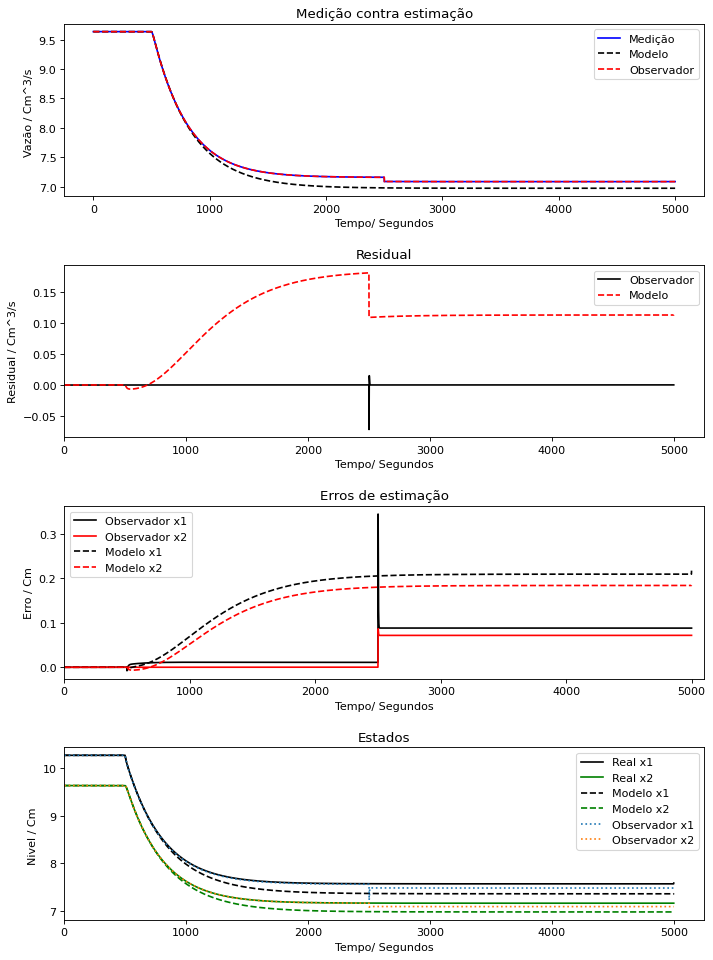

In [ ]:


ts = 1 # tempo de amostragem
tsim=np.transpose(np.arange(1,5000,1))  # numero de amostragems geradas
t = np.arange(0,(np.size(tsim)+1)*ts,ts) # Vetor de tempo
# Condição inicial sendo estado estacionario
Y = np.zeros(shape=(np.size(tsim)+1,ny))
X = np.zeros(shape=(np.size(tsim)+1,n))
U = np.ones(shape=(np.size(tsim)+1,nu))
x_hat = np.zeros(shape=(np.size(tsim)+1,n))
y_hat = np.zeros(shape=(np.size(tsim)+1,ny))
# Determinado a entrada do sistema
U[:,0] = U_ss[0]
U[:,1] = U_ss[1]
U[500:-1,0] = U_ss[0]*0.8; # Degrau positivo de 20% em f1
#U[2000:-1,1] = U_ss[1]*0.9; # Degrau negativo de 10% em f2
# Entrada em desvio
u = np.zeros((np.size(t),2))
u = U - U_ss
Y_ss = X_ss[1]

X[0,:] = X_ss
Y[0,:] = Y_ss
x_hat[0,:] = [0,0]
y_hat[0,:] = [0]
print(y_hat[0,:])
r = Y[0,:] - (y_hat[0,:] + Y_ss)
print(r)
for i in tsim:
  sol = s_int.solve_ivp(din_tanques,np.array([0,ts]),X[i-1,:],args=U[i,:])
  X[i,:] = sol.y[:,-1]
  # Saida modelada é igual ao "real" e partir de metade da simulação é feita uma incerteza na saida 
  if i < 2500:
    Y[i,:] = X[i,1] 
  else:
    Y[i,:] = X[i,1]*0.99
  x_hat[i,:] = sysd.A@np.transpose(x_hat[i-1,:]) + sysd.B@np.transpose(u[i,:]) + L@np.transpose(r)
  y_hat[i,:] = sysd.C@np.transpose(x_hat[i,:])
  r = Y[i,:] - (y_hat[i,:] + Y_ss) #Composição do residual

t_a, y, x_mod=sysc.output(u,t) # resposta do modelo linear sem realimentação
y_mod = np.reshape(y,(-1,1)) # transformação para formato de matriz multidimensional em vez de lista
e = X - (x_hat + X_ss) # erro de estimação do observador
e2 = X - (x_mod + X_ss) # erro de estimação do modelo

res = Y - (y_hat + Y_ss) # residual de estimação do observador
res2 = Y - (y_mod + Y_ss) # residual de estimação do modelo

# Construindo Grafico de respostas
fig3, ax3 = plt.subplots(4,1,figsize=(10,14),dpi=80) # Figura com dois eixos
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)
#Primeiro eixo
ax3[0].plot(t,Y,'b',label='Medição')
ax3[0].plot(t,y_mod+Y_ss,'k--',label='Modelo')
ax3[0].plot(t,y_hat+Y_ss,'r--',label='Observador')
ax3[0].set_title('Medição contra estimação')
ax3[0].set_xlabel('Tempo/ Segundos')
ax3[0].set_ylabel('Vazão / Cm^3/s ')
ax3[2].set_xlim(left=0)
ax3[0].legend()

#Segundo eixo
ax3[1].plot(t,res,'k',label='Observador')
ax3[1].plot(t,res2,'r--',label='Modelo')
ax3[1].set_title('Residual')
ax3[1].set_xlabel('Tempo/ Segundos')
ax3[1].set_ylabel('Residual / Cm^3/s')
ax3[1].set_xlim(left=0)
ax3[1].legend()

#Terceiro eixo
ax3[2].plot(t,e[:,0],'k',label='Observador x1')
ax3[2].plot(t,e[:,1],'r',label='Observador x2')
ax3[2].plot(t,e2[:,0],'k--',label='Modelo x1')
ax3[2].plot(t,e2[:,1],'r--',label='Modelo x2')
ax3[2].set_title('Erros de estimação')
ax3[2].set_xlabel('Tempo/ Segundos')
ax3[2].set_ylabel('Erro / Cm')
ax3[2].set_xlim(left=0,right = 5100)
ax3[2].legend()


ax3[3].plot(t,X[:,0],'k',label='Real x1')
ax3[3].plot(t,X[:,1],'g',label='Real x2')
ax3[3].plot(t,x_mod[:,0]+X_ss[0],'k--',label='Modelo x1')
ax3[3].plot(t,x_mod[:,1]+X_ss[1],'g--',label='Modelo x2')
ax3[3].plot(t,x_hat[:,0]+X_ss[0],':',label='Observador x1')
ax3[3].plot(t,x_hat[:,1]+X_ss[1],':',label='Observador x2')
ax3[3].set_title('Estados')
ax3[3].set_xlabel('Tempo/ Segundos')
ax3[3].set_ylabel('Nivel / Cm ')
ax3[3].set_xlim(left=0)
ax3[3].legend()

# Apos ver o Observador em funcionamento assinale algum polo instavel e veja o seu efeito

Apesar de que o observador conseguiu  diminuir o erro de estimação mas não eliminou um offset, como pode ser observado assim que foi implementado uma discrepancia na medição. esse offset instaneamente aumentou e continou.  

O principal problema com a abordagem é de Lueberguer é que ele visa diminuir a diferença entre a dinamica real e modelo com um compensão proporcional com a diferença entre a medida e a saida medida.Mas isso supõe que função de medição seja perfeitamente modelada:

$$\hat{C} = C$$

Além do resto do modelo em si. Então quando erro de estimação for zero então a discrepancia entre a medida e estimação da saida, chamada de residual, será zero. Como sabemos que realisticamente nenhum modelo é igual comportamento real principalmente para sistema linearizados como mostrado no exemplo de linearização.





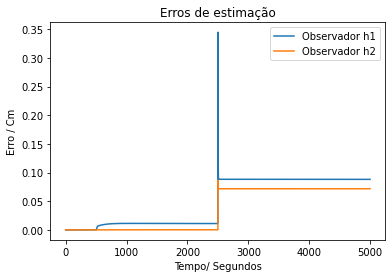

In [ ]:
plt.plot(t,e[:,0],label='Observador h1')
plt.plot(t,e[:,1],label='Observador h2')
plt.title('Erros de estimação')
plt.xlabel('Tempo/ Segundos')
plt.ylabel('Erro / Cm')
#plt.ylim(bottom = -0.2)
plt.legend()


Então isso fará com que o residual tenha valor não-nulo mesmo que $\hat{x} = x$, dessa forma a estimação convergirá para algum ponto $r=0 \rightarrow e \ne 0$  que aumentará de amplitude de acordo com a incerteza de modelo e sendo necessario um matriz $L$ com maior correção.

Semelhante a um esquema de controle, a desvantagem de aumentar muito a correção proporcional é que isso fará com que o sistema tenha um maior overshoot e demore mais de estabilizar no ponto desejado, no caso com erro proximo de zero. Além disso as saidas também são afetadas por variaveis randomicas de alta frequencia chamada de ruido nesse caso, e a correção proporcional tende a amplifica-los.



## Filtro de Kalman

O dilema no design dos observadores é encontrar uma matriz de realimentanção que diminuirar a influencia da incerteza de modelo e ao mesmo tempo não deixar que incertezas de medição e ruido alterem muito a estimação.

Uma solução que veio antes mesmo do metodo de luemberguer, o observador de estados que usa uma abordagem bayesiana para minimar a variancia da estimação chamado de Filtro de Kalman. Ele usa um algoritmo recursivo para atualizar a matriz de realimentação.

Ele se baseia no seguinte modelo de sistema:
$$
\begin{array}{ll}
x[k+1] = Ax[k]+Bu[k]+v[k]\\
y[k] =C[x]+w[k]
\end{array}
$$

A variaveis $v$ e $w$ representam discrepancia de modelo e de medição junto com ruido respectivamente. É assumido que também que essas variaveis são estocasticas gaussianas, ou seja, variam aleatoriamente com uma distribuição normal em torno do zero.

A aplicação do filtro de Kalman consiste no seguinte algoritmo:
$$
\begin{array}{ll}
x[k|k-1] = Ax[k-1]+Bu[k-1]\space (1)\\
P[k|k-1] = AP[k-1] A^T + Q\space(2) \\
K = P[k|k-1]C^T(CP^TC^T+R)^{-1} \space (3) \\
x[k|k] = x[k|k-1] + K(y[k]-Cx[k|k-1])\space (4) \\
P[k|k] = (I-KC)P[k|k-1]\space (5)
\end{array}
$$

As equações (1) e (2) é a predição feita pelo modelo para estimativa do estado e do erro de estimação. com essa informação é calculado a matriz de realimentação na equação (3) e então são atualizados as informaçãoes com essa matriz nas equações (4) e (5). Com esse algoritmo é previsto convergir em uma matriz que minimize o erro de estimação e sua variancia.

As matrizes $Q$ e $R$ são as matrizes de covariancia dos disturbio do sistema. Elas indicam o comportamento esperado das variaveis gaussianas.
$$
Q = Cov(v)\\
R = Cov(w) 
$$

Esse algoritmo produz o melhor resultado a partir das informações das matrizes do modelo e das matrizes de covariancia do sistema. Com escolha das matrizes $Q$ e $R$ podemos sintonizar o filtro, indicando quais informações são mais confiaveis.

* $\color{blue}{\text{Mais confiança no modelo:}}\space Q→0_n$.
* $\color{green}{\text{Mais confiança na medição:}}\space R→0_{ny}$

Dessa forma a matriz de correção $K$ tenderá a ser menor no primeiro caso e maior no segundo caso.

### Ação integrativa

No entanto mesmo assim o algoritmo sofreria de um erro de estaddo estacionario por de incerteza de modelo. Para adereçar isso é preciso adicionar um ação integrativa eliminar o offset no erro de estimação, ou seja adicionar uma dinamica com autovalor igual a 0, em sistemas continuo, ou igual a 1, em sistemas discreto. Uma forma de fazer isso é expandir os estados do sistema para incluir a dinamica das entradas. Para isso é feito a seguinte relação:
$$
u[k] = du[k]+u[k-1]
$$
aplicando o valor da entrada como estado:
$$
\bar{x}[k] = \begin{bmatrix}x[k] \\ u[k-1]\end{bmatrix}\\
\bar{x}[k+1] = \begin{bmatrix} A & B \\ 0 & I\end{bmatrix}\bar{x}[k]+\begin{bmatrix}B\\I\end{bmatrix}\cdot du[k]
$$

é possivel ver então que foram adicionar $nu$ autovalores com valor unitario assim aplicando a ação integrativa e não mudando os metodos de obtenção da matriz de realimentação. 

## Filtro de Kalman estendido

Um dos espaços para melhora do filtro de Kalman e observadores em geral é melhorar o modelo usado, para isso o caminho seria usar observadores não-lineares. No entanto é dificil calcular uma convergencia do erro de estimação para uma dinamica não-linear, por isso Uma modificicação bastante feita no filtro de Kalman usando a mesmo algoritmo de correção é fazendo linearizações a cada passo.
$$
\
\begin{array}{ll}
x[k|k-1] = f(x[k-1],u[k-1])\\
P[k|k-1] = A_kP[k-1] A_k^T + Q\\
K = P[k|k-1]C_k^T(CP^TC^T+R)^{-1} \\
x[k|k] = x[k|k-1] + K(y[k]-Cx[k|k-1])\\
P[k|k] = (I-KC_k)P[k|k-1]
\end{array}\\
$$
Em que:
$$
\dot{x} = f(x,u) \\
y = h(x,u) \\
A_k = \begin{bmatrix}\frac{df(x,u)}{dx}\end{bmatrix}_{(x[k-1],u[k-1])} \\
B_k = \begin{bmatrix}\frac{df(x,u)}{du}\end{bmatrix}_{(x[k-1],u[k-1])}\\
C_k = \begin{bmatrix}\frac{dh(x,u)}{dx}\end{bmatrix}_{(x[k-1],u[k-1])}
$$

Dessa será produzindo um modelo linear a cada predição e o algoritmo recursivo será preservado. No entanto como as propriedades do sistema linear estarão mudando, não há garantia de convergencia da estimação, e dessa forma também é mais dificil escolher matrizes de covariancia para um melhor resultado.


# 5. Aplicação

Com o objetivo de consolidar os conhecimentos apresentados anteriormente e fazer aplicação do estimadores de estados, iremos realizar o estudo de estimação dos dados de um sistema de quatro tanques interligados apresentados por Johansson (2000) no artigo “The Quadruple-Tank Process: A Multivariable Laboratory Process with an Adjustable Zero”. Ele descreve um típico modelo não linear para controle multivariável com quatro tanques acoplados. Ele consiste de duas colunas com cada uma com dois tanques empilhados em são duplamente alimentados de acordo com o diagrama abaixo:
<center>
<div>
  <img src="https://d3i71xaburhd42.cloudfront.net/4cd444da7ae81b53896ecbf3e0a9a498e1ec0fcc/1-Figure1-1.png" width="250"/>
</div>
Diagrama de sistema de quatro tanques
</center>

A modelagem de suas EDO's junto dos valores de seu parametros pode ser vista no artigo, usando escoamento por Bernoulli, formando o seguinte modelo:

\begin{array}{lll}
  \dot{h_1} =-\frac{a_1}{A_1}\sqrt{2gh_1}+\frac{a_3}{A_1}\sqrt{2gh_3}+\frac{\gamma_1k_1}{A_1}v_1\\
  \dot{h_2} =-\frac{a_2}{A_2}\sqrt{2gh_2}+\frac{a_4}{A_2}\sqrt{2gh_4}+\frac{\gamma_2k_2}{A_2}v_2\\
  \dot{h_3} =-\frac{a_3}{A_3}\sqrt{2gh_3}+\frac{(1-\gamma_2)k_2}{A_3}v_2\\
  \dot{h_4}=-\frac{a_4}{A_4}\sqrt{2gh_4}+\frac{(1-\gamma_1)k_1}{A_4}v_1 \\
\end{array}

Pode ser observado que é um sistema bastante interativo.Os estados escolhidos mais adequados seriam exatamente os niveis $h_1,h_2,h_3$ e $h_4$ com as entradas do sistema sendo as tensão das bombas $v_1$ e $v_2$, Com isso podemos simular o sistema em Python

Os parametros do sistema irão definir o comportamento do sistema. Dessa forma para demonstrar como os observadores são influenciados pela incerteza de modelo, vamos construir um sistema com parametros ligeiramente diferentes do modelo. 

A partir do artigo de Johansson deduzimos parametros compativeis e ao mesmo tempo com respostas mais facil de visualizar. Formando o sistema abaixo

In [ ]:
def quatro_tanques_real(t,x,u):

  A1 = 2.805
  A2 = 3.203
  A3 = 2.803
  A4 = 3.206

  a1 = 0.702
  a2 = 0.603
  a3 = 0.701
  a4 = 0.602

  k1 = 33.2
  k2 = 34.9

  yg1 = 0.7
  yg2 = 0.6

  g = 9.78
  
  
  h1 = x[0]
  h2 = x[1]
  h3 = x[2]
  h4 = x[3]
  v1 = u[0]
  v2 = u[1]

  dh1 = -(a1/A1)*sqrt(2*g*h1) + (a3/A1)*sqrt(2*g*h3) + (yg1*k1/A1)*v1;
  dh2 = -(a2/A2)*sqrt(2*g*h2) + (a4/A2)*sqrt(2*g*h4) + (yg2*k2/A2)*v2;
  dh3 = -(a3/A3)*sqrt(2*g*h3) + ((1-yg2)*k2/A3)*v2;
  dh4 = -(a4/A4)*sqrt(2*g*h4) + ((1-yg1)*k1/A4)*v1;
  return [dh1,dh2,dh3,dh4]

Suponha que foi feito um trabalho de indentificação dos parametros. Como é um sistema simples e a maioria dos parametros são medidas fisicas então se conseguiu parametros bastante proximos. sendo conseguido o modelo abaixo:

In [ ]:
def quatro_tanques(t,x,u):

  A1 = 2.8
  A2 = 3.2
  A3 = 2.8
  A4 = 3.2

  a1 = 0.7
  a2 = 0.6
  a3 = 0.7
  a4 = 0.6

  k1 = 33
  k2 = 35

  yg1 = 0.7
  yg2 = 0.6

  g = 9.8
  
  
  h1 = x[0]
  h2 = x[1]
  h3 = x[2]
  h4 = x[3]
  v1 = u[0]
  v2 = u[1]

  dh1 = -(a1/A1)*sqrt(2*g*h1) + (a3/A1)*sqrt(2*g*h3) + (yg1*k1/A1)*v1;
  dh2 = -(a2/A2)*sqrt(2*g*h2) + (a4/A2)*sqrt(2*g*h4) + (yg2*k2/A2)*v2;
  dh3 = -(a3/A3)*sqrt(2*g*h3) + ((1-yg2)*k2/A3)*v2;
  dh4 = -(a4/A4)*sqrt(2*g*h4) + ((1-yg1)*k1/A4)*v1;
  
  return [dh1,dh2,dh3,dh4]

Dessa é preciso definir as variaveis que serão medidas no sistema para podemos montar um sistema em espaços de estados. Seria viavel medimos todos os estados mas como um exercicio para demonstrar a importancia da analise do sistema, vamos tentar ver o numero minimo de sensores

Se analisarmos a equações diferencias podemos ver que não é possivel extrair informações de nenhum outro estado se medirmos $h_3$ e $h_4$, mas também que ao medir $h_1$ temos podemos inferir o valor de $h_3$ e a partir de $h_2$ o valor de $h_4$. Dessa forma é possivel observar todo o sistema medindo somente $h_1$ e $h_2$.



### Modelo linear

Para podemos desenvolver os estimadores precisamos de um modelo LTI. dessa forma precisamos linearizar essse sistema. então executamos o mesmo procedimento com Serie de Taylor. O valor das constanstes $k_1$ e $k_2$ foram escolhidos para que as entradas de referencias sejam igual a 1.

In [ ]:
g = sym.symbols('g')
h1,h2,h3,h4 = sym.symbols('h_1 h_2 h_3 h_4')
v1, v2 = sym.symbols('v_1 v_2')
a1,a2,a3,a4 = sym.symbols('a_1 a_2 a_3 a_4')
A1,A2,A3,A4 = sym.symbols('A_1 A_2 A_3 A_4')
yg1 , yg2 = sym.symbols('gamma_1 gamma_2')
k1, k2 = sym.symbols('k_1 k_2')

dh1 = -(a1/A1)*sym.sqrt(2*g*h1) + (a3/A1)*sym.sqrt(2*g*h3) + (yg1*k1/A1)*v1
dh2 = -(a2/A2)*sym.sqrt(2*g*h2) + (a4/A2)*sym.sqrt(2*g*h4) + (yg2*k2/A2)*v2
dh3 = -(a3/A3)*sym.sqrt(2*g*h3) + ((1-yg2)*k2/A3)*v2
dh4 = -(a4/A4)*sym.sqrt(2*g*h4) + ((1-yg1)*k1/A4)*v1

F = sym.Matrix([dh1,dh2,dh3,dh4])
X = sym.Matrix([h1,h2,h3,h4])
Y = sym.Matrix([h1,h2])
U = sym.Matrix([v1,v2])


As = F.jacobian(X)
Bs = F.jacobian(U)
Cs = Y.jacobian(X)
Ds = Y.jacobian(U)

[143.3163 135.3189  20.4082  13.8903]


Text(0, 0.5, 'Nivel / Metros')

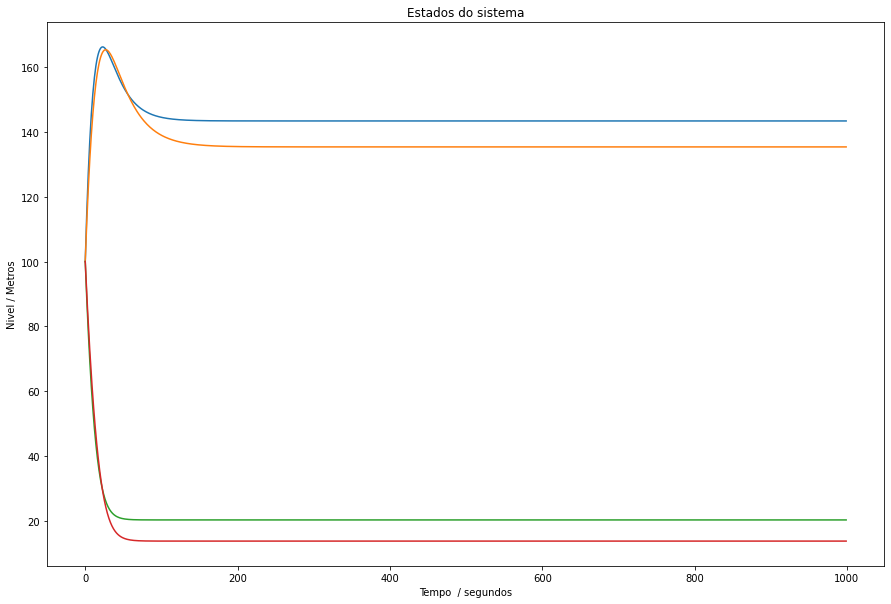

In [ ]:
# Paramentros do modelo
A_1 = 2.8
A_2 = 3.2
A_3 = 2.8
A_4 = 3.2

a_1 = 0.7
a_2 = 0.6
a_3 = 0.7
a_4 = 0.6

k_1 = 33
k_2 = 35

yg_1 = 0.7
yg_2 = 0.6

grav = 9.8

As = As.subs([(A1,A_1),(A2,A_2),(A3,A_3),(A4,A_4),(a1,a_1),(a2,a_2),(a3,a_3),(a4,a_3),(g,grav)])
Bs = Bs.subs([(A1,A_1),(A2,A_2),(A3,A_3),(A4,A_4),(k1,k_1),(k2,k_2),(yg1,yg_1),(yg2,yg_2)])

# Conseguindo o estado estacionario
n = 4; # ordem do sistema 
ts = 1 # tempo de amostragem
tsim=np.transpose(np.arange(1,1000,1))  # numero de amostragems geradas
x0 = np.array([100,100,100,100]) 
X = np.zeros(shape=(np.size(tsim)+1,n))
X[0,:] = x0
U_ss = (1,1) # valor das entradas que irão gerar o estado estacionario 
for i in tsim:
  # Integração do sistema de EDO's
  sol = s_int.solve_ivp(quatro_tanques,np.array([0,ts]),X[i-1,:],args=[U_ss])
  X[i,:] = sol.y[:,len(sol.y[1,:])-1]

X_ss = X[-1,:]
print(X_ss)

fig,ax = plt.subplots(figsize=(15,10))
ax.set_title('Estados do sistema')
ax.plot(X[:,0],label = 'h1')
ax.plot(X[:,1],label = 'h2')
ax.plot(X[:,2],label = 'h3')
ax.plot(X[:,3],label = 'h4')
ax.set_xlabel('Tempo  / segundos')
ax.set_ylabel('Nivel / Metros')

In [ ]:
# substituindo o estado estacionario nas matrizes 
A = As.subs([(h1,X_ss[0]),(h2,X_ss[1]),(h3,X_ss[2]),(h4,X_ss[3])])
B = Bs.subs([(v1,3),(v2,3)])
A

Matrix([
[-0.0326870115831517*sqrt(2),                           0,  0.086620580695352*sqrt(2),                           0],
[                          0, -0.0252292953481607*sqrt(2),                          0,  0.0918703128587067*sqrt(2)],
[                          0,                           0, -0.086620580695352*sqrt(2),                           0],
[                          0,                           0,                          0, -0.0918703128587067*sqrt(2)]])

In [ ]:
A_ss = np.array(A,dtype=np.float64)
B_ss = np.array(B,dtype=np.float64)
C_ss = np.array(Cs,dtype=np.float64) # Não existem incognitas nas matrizes Cs e Ds
D_ss = np.array(Ds,dtype=np.float64)
sysc = signal.lti(A_ss,B_ss,C_ss,D_ss)
print(sysc)
sysd = sysc.to_discrete(ts)
print(sysd)

StateSpaceContinuous(
array([[-0.0462,  0.    ,  0.1225,  0.    ],
       [ 0.    , -0.0357,  0.    ,  0.1299],
       [ 0.    ,  0.    , -0.1225,  0.    ],
       [ 0.    ,  0.    ,  0.    , -0.1299]]),
array([[8.25  , 0.    ],
       [0.    , 6.5625],
       [0.    , 5.    ],
       [3.0938, 0.    ]]),
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]]),
array([[0., 0.],
       [0., 0.]]),
dt: None
)
StateSpaceDiscrete(
array([[0.9548, 0.    , 0.1126, 0.    ],
       [0.    , 0.9649, 0.    , 0.1196],
       [0.    , 0.    , 0.8847, 0.    ],
       [0.    , 0.    , 0.    , 0.8782]]),
array([[8.0622, 0.2896],
       [0.1903, 6.4468],
       [0.    , 4.7059],
       [2.9012, 0.    ]]),
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]]),
array([[0., 0.],
       [0., 0.]]),
dt: 1
)


Então faremos a implementação dos algoritmos. Por conveniencia os separamos em funções.

In [ ]:
def KF(sys,Q,R,yk,xk,uk,Pk):

    xk = np.transpose(xk)
    uk = np.transpose(uk)
    yk = np.transpose(yk)

    xkk = sys.A@xk + sys.B@uk
    Pm = sys.A@Pk@np.transpose(sys.A) + Q
    res = yk - sys.C@xkk
    aux = np.linalg.inv(sys.C@Pm@np.transpose(sys.C) + R)
    K = Pm@np.transpose(sys.C)@aux
    xhat = xkk + K@res
    KC = K@sys.C
    Pkk = (np.eye(shape(KC)[0])-KC)@Pm

    xhat = np.transpose(xhat)
    res = np.transpose(res)

    return [xhat,res,Pkk]

É comum nos algoritmos que as Jacobianas do sistema possa ser previamente calculadas, com intuito de acelerar e deixar mais robusto a estimação. Como podemos definir as jacobianas simbolica adquirida então não é preciso recalcular dentro do algoritmo.

In [ ]:
def EKF_tanques(Q,R,yk,xk,uk,Pk,As,Cs):

    As = As.subs([(h1,xk[0]),(h2,xk[1]),(h3,xk[2]),(h4,xk[3])])
    
    A = np.array(As,dtype=np.float64)
    C = np.array(Cs,dtype=np.float64)

    
    yk = np.transpose(yk)

    sol = s_int.solve_ivp(quatro_tanques,np.array([0,ts]),xk,args=uk)
    xkk = np.transpose(sol.y[:,len(sol.y[1,:])-1])
    Pm = A@Pk@np.transpose(A) + Q
    res = yk - C@xkk
    aux = np.linalg.inv(C@Pm@np.transpose(C) + R)
    K = Pm@np.transpose(C)@aux
    xhat = xkk + K@res
    KC = K@C
    Pkk = (np.eye(shape(KC)[0])-KC)@Pm


    xhat = np.transpose(xhat)
    res = np.transpose(res)

    return [xhat,res,Pkk]

## Geração de dados

Então primeiramente gerarmos as medições do sistema. Como dito anteriormente as medição estão sujeitas a dois tipos de disturbios. ruido e incerteza de medição. Para simularmos isso podemos introduzir adicionar diretamente um ruido gaussiano ao valor medido além de um offset constante. Uma outra forma de introduzir incerteza no modelo é atraves de disturbios na entrada que não são conhecidos.

[138.6163 140.5189  24.9082  16.1903]
[[0.0175, -0.0104]]
<class 'numpy.ndarray'>
[-5, 4.5]


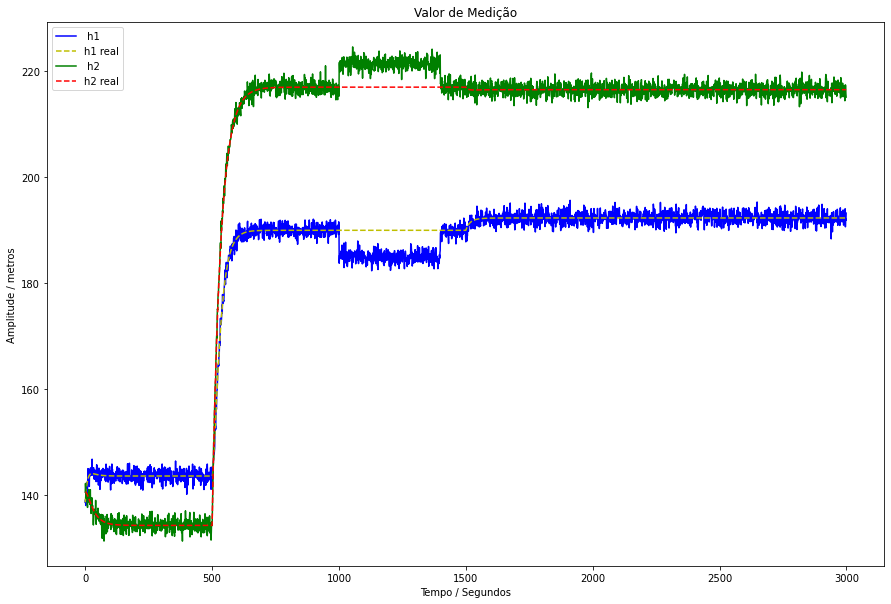

In [ ]:
n = 4
nu = 2
ny = 2

ts = 1 # tempo de amostragem
tsim=np.transpose(np.arange(1,3000,1))  # numero de amostragems geradas
x0 = X_ss + [-4.7,5.2,4.5,2.3]
print(x0)
X = np.zeros(shape=(np.size(tsim)+1,n))
U = np.zeros(shape=(np.size(tsim)+1,nu))
Y = np.zeros(shape=(np.size(tsim)+1,ny))


U = np.ones(shape=(np.size(tsim)+1,nu))*1
U[500:-1,1] = 1.4 # Degrau de 40% na segunda entrada
#U[2000:-1,1] = 1


X[0,:] = x0
Y[0,:] = X[0,0:2]

#P_noise =np.reshape(np.random.normal(size=(1,2))*0.01,(1,2))
P_noise = [[0.0175,-0.0104]]
print(P_noise)
print(type(U[0,:]))

R_noise = [-1*5,0.9*5] # amplitude do offset
print(R_noise)
for i in tsim:
  uk = [U[i-1,:]]
  if(i > 1500 ):
    uk = np.array(U[i-1,:] + P_noise)
  sol = s_int.solve_ivp(quatro_tanques_real,np.array([0,ts]),X[i-1,:],args=uk)
  mess_error = np.random.normal(size=(1,2))*1 # Ruido de medição com desvio padrão de 0.1 metros
  X[i,:] = sol.y[:,len(sol.y[1,:])-1]
  Y[i,:] = X[i,0:2] + mess_error
  if(i > 1000 and i < 1400 ):# Entre os momento 1000 e 1400 a aplicação de um bias nas medições 
    Y[i,:] = Y[i,:] + R_noise
    

T = np.linspace(0,tsim[-1],num=len(Y))
fig,ax = plt.subplots(figsize=(15,10))

ax.plot(T,Y[:,0],'b',label = ' h1')
ax.plot(T,X[:,0],'y--',label = 'h1 real')
ax.plot(T,Y[:,1],'g',label = ' h2')
ax.plot(T,X[:,1],'r--',label = 'h2 real')

ax.set_title('Valor de Medição')
ax.set_ylabel('Amplitude / metros')
ax.set_xlabel('Tempo / Segundos')
ax.legend()

Com o ruido não é possivel observar mas o sistema estaciona em nivel diferente do esperado do modelo o que indicaria a discrepancia. Mas em conjunto com o ruido na medição e incerteza das entradas podem mascarar esse efeito.

Com os valores de medição então vamos simular a respostas dos KF e EKF.Mais importante de tudo é definir as matrizes de covariancia $Q$ e $R$. Como nós temos bastante segurança sobre confiabilidade do modelo e temos um sinal ruidoso e possivel offset, um palpite seria uma matriz $Q$ baixa e $R$ mais alta.

A matriz $P$ inicial deixaremos como indentidade.

In [ ]:
Q_KF = np.eye(n)*1
R_KF = np.eye(ny)*10

Q_EKF = np.eye(n)*1
R_EKF = np.eye(ny)*10

P_KF = np.eye(n)
P_EKF = np.eye(n)


Refazendo as jacobianas simbolicas.


In [ ]:

#Conseguindo a jacobiana
h1,h2,h3,h4 = sym.symbols('h_1 h_2 h_3 h_4')
v1, v2 = sym.symbols('v_1 v_2')
A1 = A_1;
A3 = A_3;
A2 = A_2;
A4 = A_4;

a1 = a_1;
a2 = a_2;
a3 = a_3;
a4 = a_3;

k1 = k_1; 
k2 = k_2;

yg1 = yg_1;
yg2 = yg_2;

g = grav;

dh1 = -(a1/A1)*sym.sqrt(2*g*h1) + (a3/A1)*sym.sqrt(2*g*h3) + (yg1*k1/A1)*v1;
dh2 = -(a2/A2)*sym.sqrt(2*g*h2) + (a4/A2)*sym.sqrt(2*g*h4) + (yg2*k2/A2)*v2;
dh3 = -(a3/A3)*sym.sqrt(2*g*h3) + ((1-yg2)*k2/A3)*v2;
dh4 = -(a4/A4)*sym.sqrt(2*g*h4) + ((1-yg1)*k1/A4)*v1;

F = sym.Matrix([dh1,dh2,dh3,dh4])
State = sym.Matrix([h1,h2,h3,h4])
Out = sym.Matrix([h1,h2])

As = F.jacobian(State)
Cs = Out.jacobian(State)

In [ ]:
#Preparando as variaveis de estimação

x_KF = np.zeros(shape=(np.size(tsim)+1,n))
x_EKF = np.zeros(shape=(np.size(tsim)+1,n))

# Estimativa inicial é de valor no estacionario
x_EKF[0,:] = X_ss
x_KF[0,:] = [0,0,0,0]

for i in tsim:
  yk = Y[i,:] - X_ss[0:2]
  uk = U[i-1,:] - U_ss
  x_KF[i,:],res_KF,P_KF = KF(sysd,Q_KF,R_KF,yk,x_KF[i-1,:],uk,P_KF)
  x_EKF[i,:],res_EKF,P_EKF = EKF_tanques(Q_EKF,R_EKF,Y[i,:],x_EKF[i-1,:],[U[i-1,:]],P_EKF,As,Cs)


T = np.linspace(0,tsim[-1],num=len(X))

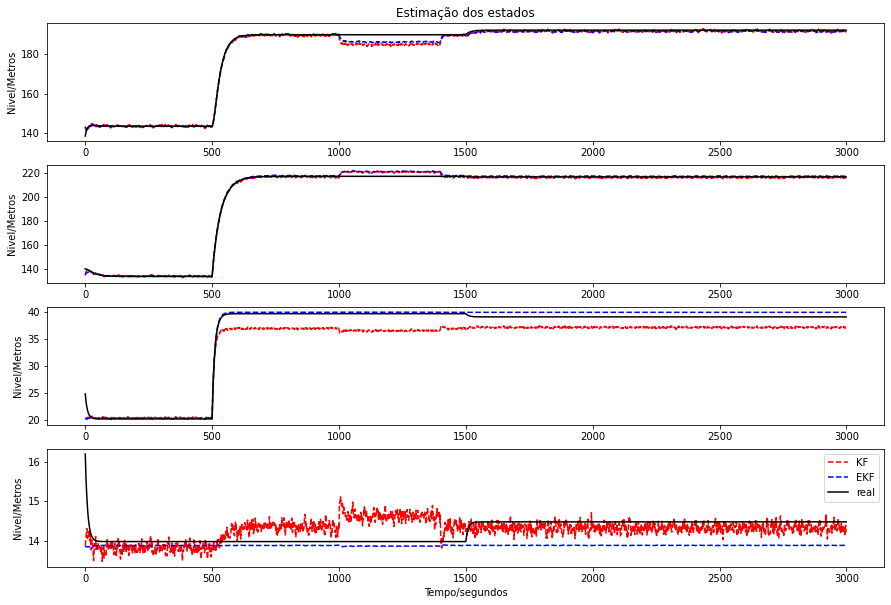

In [ ]:
fig2 , ax2 = plt.subplots(4,1,figsize=(15,10))
l = (0,1,2,3)
for k in l:
  ax2[k].plot(T,x_KF[:,k]+X_ss[k],'r--',label = 'KF')
  ax2[k].plot(T,x_EKF[:,k],'b--',label = 'EKF')
  ax2[k].plot(T,X[:,k],'k',label = 'real')
  ax2[k].set_ylabel('Nivel/Metros')

ax2[0].set_title('Estimação dos estados')
ax2[3].set_xlabel('Tempo/segundos')
plt.legend()

Logo vermos que a discrepancia de modelo produz um certo offset nas estimações dos estados não medidos perto do estado estacionario esse offset não tem muita diferença mas  aumenta a medida que o modelo linear se afastar da seu ponto de linearização. Perceba também que o EKF é bem menos sensivel a ruido de medição que o KF que produz uma estimação bem mais ruidosa.

Como dito o desempenho dos estimadores depende bastante da sintonização. Tente mudar os valores dos matrizes de cada estimador para conseguir um melhor resultado

## Efeito com ação integral

Vamos ver agora a implementação e efeito da ação integral sobre a estimação usando o Filtro de Kalman.

In [ ]:
A = sysd.A.copy()
B = sysd.B.copy()
C = sysd.C.copy()
D = sysd.D.copy()

sys_exp = signal.dlti(A,B,C,D,dt=1)
aux = np.hstack((np.zeros((B.shape[1],A.shape[1])),np.eye(B.shape[1])))
sys_exp.A = np.vstack((np.hstack((A,B)),aux))
sys_exp.B = np.vstack((B,np.eye(B.shape[1])))
sys_exp.C = np.hstack((C,D))
sys_exp.D = np.array(np.zeros(shape(D)))
print(sys_exp)

StateSpaceDiscrete(
array([[0.9548, 0.    , 0.1126, 0.    , 8.0622, 0.2896],
       [0.    , 0.9649, 0.    , 0.1196, 0.1903, 6.4468],
       [0.    , 0.    , 0.8847, 0.    , 0.    , 4.7059],
       [0.    , 0.    , 0.    , 0.8782, 2.9012, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    ]]),
array([[8.0622, 0.2896],
       [0.1903, 6.4468],
       [0.    , 4.7059],
       [2.9012, 0.    ],
       [1.    , 0.    ],
       [0.    , 1.    ]]),
array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]]),
array([[0., 0.],
       [0., 0.]]),
dt: 1
)


[143.3163 135.3189  20.4082  13.8903]


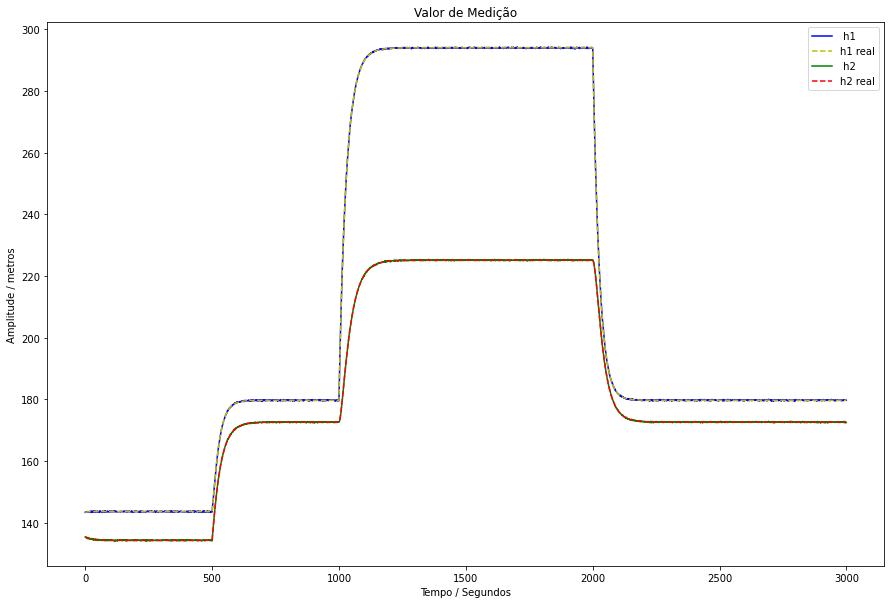

In [ ]:
n = 4
nu = 2
ny = 2

ts = 1 # tempo de amostragem
tsim=np.transpose(np.arange(1,3000,1))  # numero de amostragems geradas
x0 = X_ss
print(x0)
X = np.zeros(shape=(np.size(tsim)+1,n))
U = np.zeros(shape=(np.size(tsim)+1,nu))
Y = np.zeros(shape=(np.size(tsim)+1,ny))


U = np.ones(shape=(np.size(tsim)+1,nu))*1
U[1000:-1,0] = 1.5
U[2000:-1,0] = 1


X[0,:] = x0
Y[0,:] = X[0,0:2]

P_noise = [[0.1,0.15]] # Incerteza aplicada na entrada

for i in tsim:
  uk = [U[i-1,:]]
  if(i > 500 ):
    uk = np.array(U[i-1,:] + P_noise)
  sol = s_int.solve_ivp(quatro_tanques_real,np.array([0,ts]),X[i-1,:],args=uk)
  mess_error = np.random.normal(size=(1,2))*0.1 # Ruido de medição com desvio padrão de 0.1 metros
  X[i,:] = sol.y[:,len(sol.y[1,:])-1]
  Y[i,:] = X[i,0:2] + mess_error

T = np.linspace(0,tsim[-1],num=len(Y))
fig,ax = plt.subplots(figsize=(15,10))

ax.plot(T,Y[:,0],'b',label = ' h1')
ax.plot(T,X[:,0],'y--',label = 'h1 real')
ax.plot(T,Y[:,1],'g',label = ' h2')
ax.plot(T,X[:,1],'r--',label = 'h2 real')

ax.set_title('Valor de Medição')
ax.set_ylabel('Amplitude / metros')
ax.set_xlabel('Tempo / Segundos')
ax.legend()


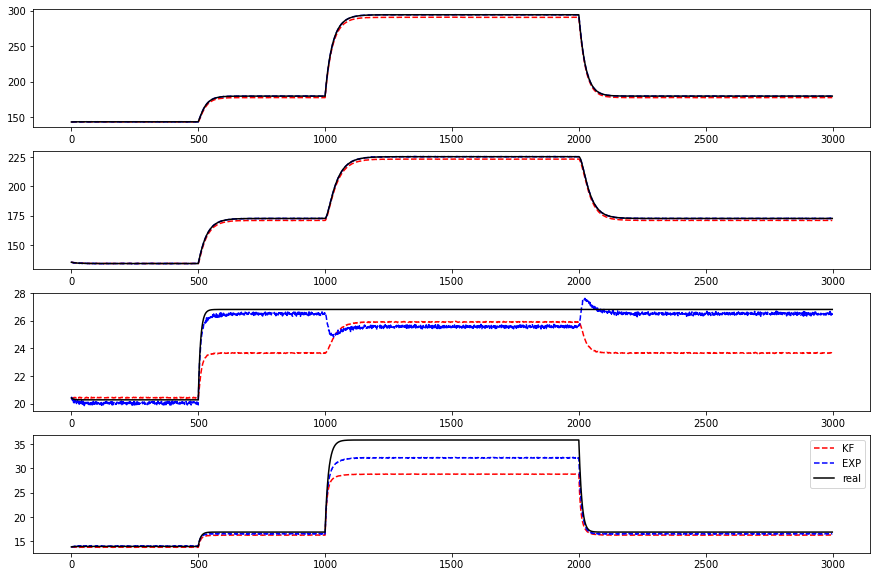

In [ ]:
x_KF = np.zeros(shape=(np.size(tsim)+1,n))
x_EXP = np.zeros(shape=(np.size(tsim)+1,n+nu))
P_KF = np.eye(4)
P_EXP = np.eye(n+nu)

Q = np.eye(n)*1
Qe = np.eye(n+nu)*1

R = np.eye(ny)*5

for i in tsim:
  yk = Y[i,:] - X_ss[0:2]
  duk = U[i,:] - U[i-1,:]# Entrada em derivada
  uk = U[i-1,:] - U_ss
  x_KF[i,:],res_KF,P_KF = KF(sysd,Q_KF,R,yk,x_KF[i-1,:],uk,P_KF)
  x_EXP[i,:],a,P_EXP = KF(sys_exp,Qe,R,yk,x_EXP[i-1,:],duk,P_EXP)

fig2 , ax2 = plt.subplots(4,1,figsize=(15,10))
l = (0,1,2,3)
for k in l:
  ax2[k].plot(T,x_KF[:,k]+X_ss[k],'r--',label = 'KF')
  ax2[k].plot(T,x_EXP[:,k]+X_ss[k],'b--',label = 'EXP')
  ax2[k].plot(T,X[:,k],'k',label = 'real')

plt.legend()


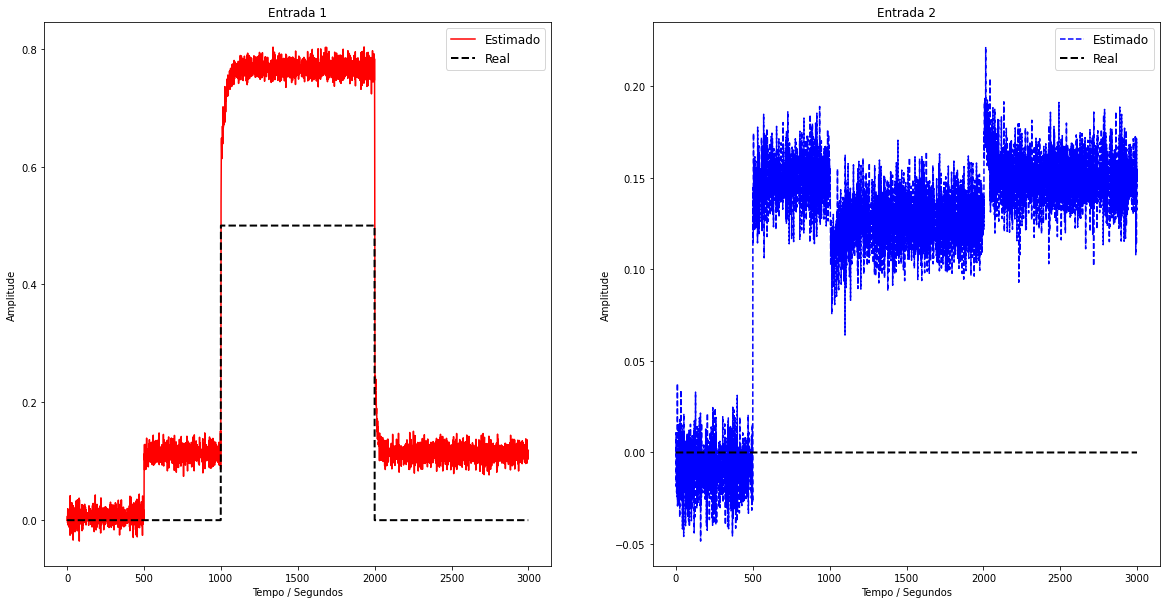

In [ ]:
fig3 , ax3 = plt.subplots(1,2,figsize=(20,10))

ax3[0].plot(T,x_EXP[:,4],'r',label = 'Estimado')
ax3[0].plot(T,U[:,0] - U_ss[0],'k--',label = 'Real',linewidth=2)
ax3[0].set_title('Entrada 1')
ax3[0].set_xlabel('Tempo / Segundos')
ax3[0].set_ylabel('Amplitude')
ax3[1].plot(T,x_EXP[:,5],'b--',label = 'Estimado')
ax3[1].plot(T,U[:,1] - U_ss[1],'k--',label = 'Real',linewidth=2)
ax3[1].set_title('Entrada 2')
ax3[1].set_xlabel('Tempo / Segundos')
ax3[1].set_ylabel('Amplitude')
ax3[0].legend(fontsize = 'large')
ax3[1].legend(fontsize = 'large')

Perceba que o valor de offset na estimação de entrada, fica justamente perto do valor da incerteza aplicado na entrada. Dessa forma vermos que a ação integral se aplica em tentar ajustar os parametros de entrada para conseguir a melhor estimação, dessa forma diminuindo o offset por conta da incerteza de modelo.






#6.  Conclusão

Estimadores de estado são ferramentas bastante importantes para controle e monitoramento de sistemas. Mas,  nenhuma solução será perfeita, assim como modelos, é preciso ter bastante conhecimento sobre o processo para obter o melhor resultado com essa ferramenta. 

Com isso espera que o leitor tenha conseguido entender melhor a construção e a manipulação de sistemas com Espaço de Estados. Além ter uma boa visão da implementação de estimadores de estado.

Estejam a vontade para copiar e replicar conteudo e codigo, Além de expandir o seu conteudo.

# 7. Referencias

Ogata, K. and Pearson (2016). Modern control engineering. Delhi: Pearson.

Barcellos, Y. (2016). MODELAGEM E IDENTIFICAÇÃO LINEAR DE UMA PLANTA PILOTO COM TANQUES INTERATIVOS.

Johansson, K., 2000. The quadruple-tank process: a multivariable laboratory process with an adjustable zero. IEEE Transactions on Control Systems Technology, 8(3), pp.456-465.
